In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
import joblib
  
  

C:\Users\unnati\AppData\Local\Temp\ipykernel_13480\2646676265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Loading the dataset
data=pd.read_csv("creditcard.csv")

In [3]:
#checking the shape of the dataset 
data.shape

(284807, 31)

In [4]:
# as we can see that there is no null value in any one of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:

data['Amount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 
  

In [6]:
# Time and amount column is of no use hence dropping both 
data.drop(["Time","Amount"],axis=1,inplace=True)

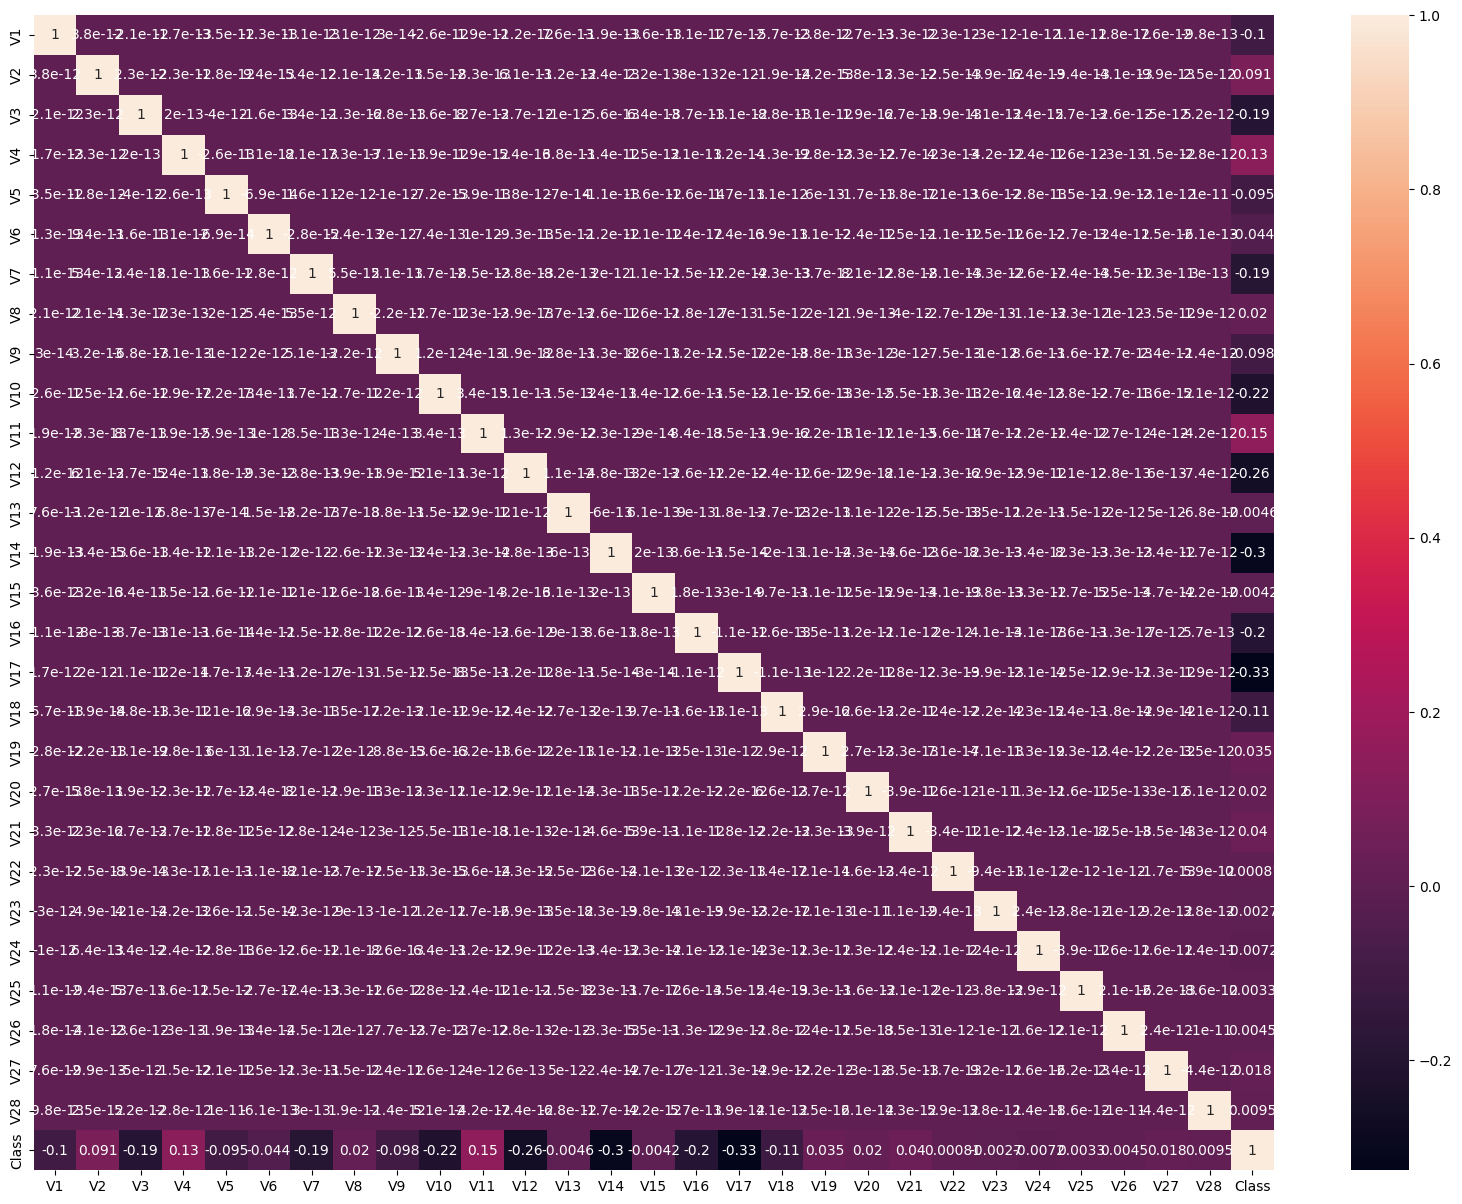

In [7]:
# Correlation between independent and dependent variable 
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()


In [8]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

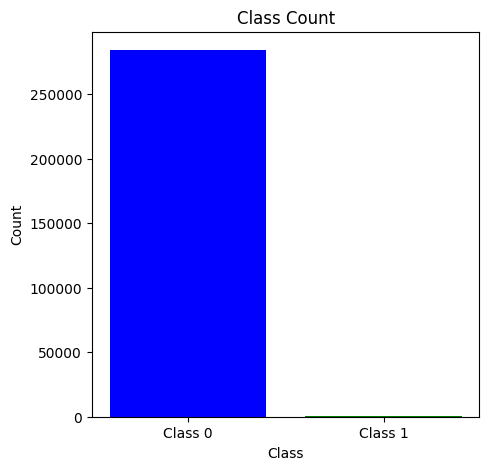

In [9]:
class_count = [284315, 492]
class_labels = ['Class 0', 'Class 1']

# Plot
plt.figure(figsize=(5, 5))
plt.bar(class_labels, class_count, color=['blue', 'green'])
plt.title('Class Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


c:\Users\unnati\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



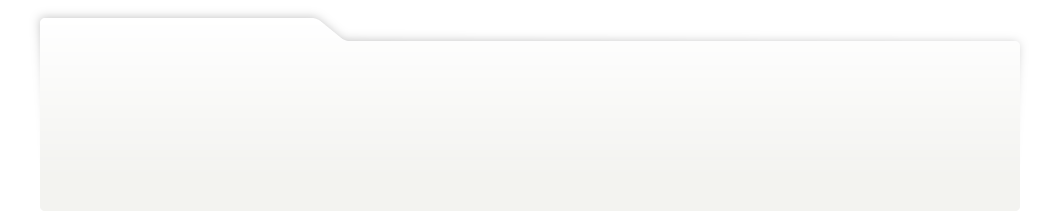
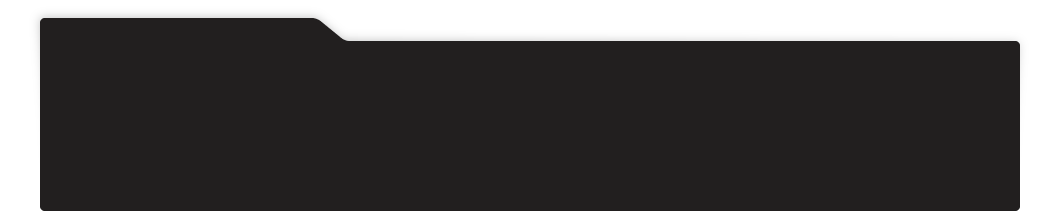
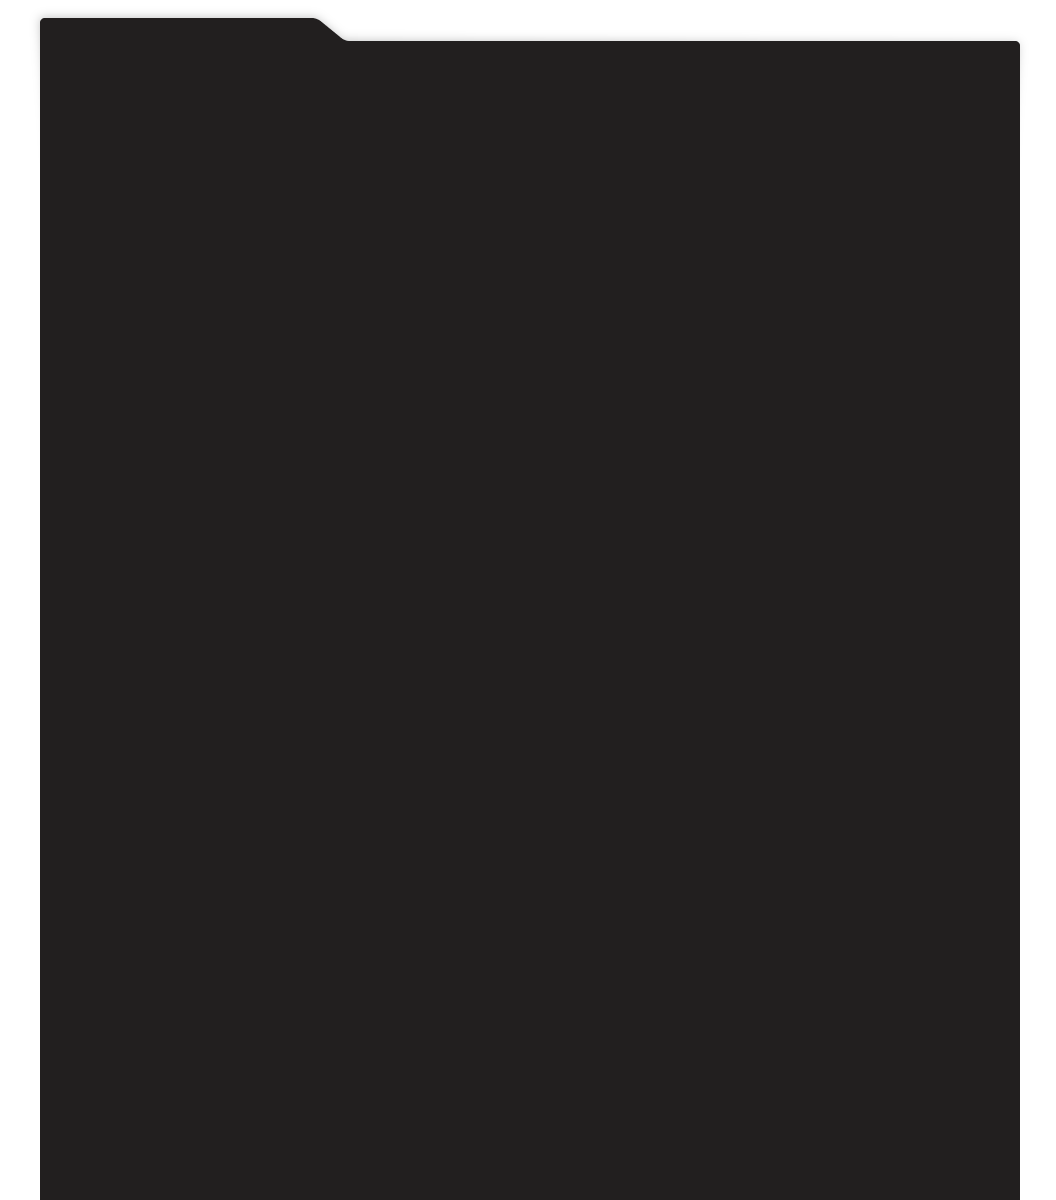
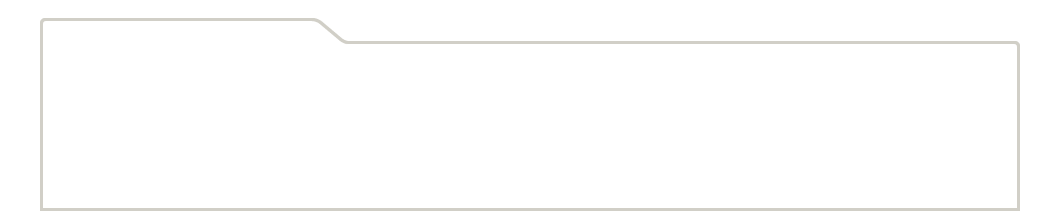
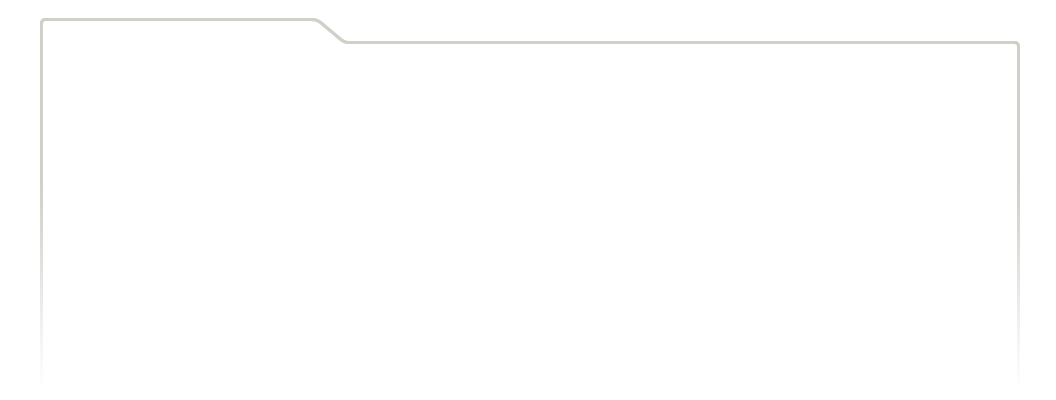
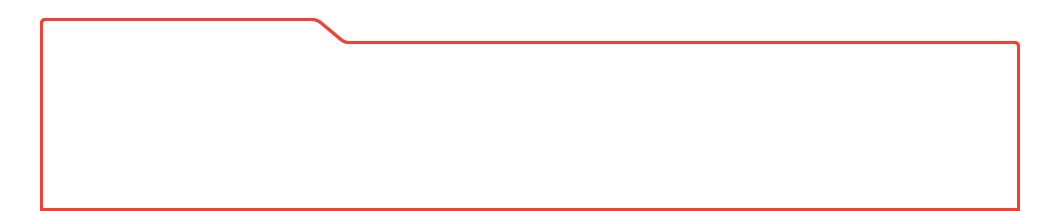
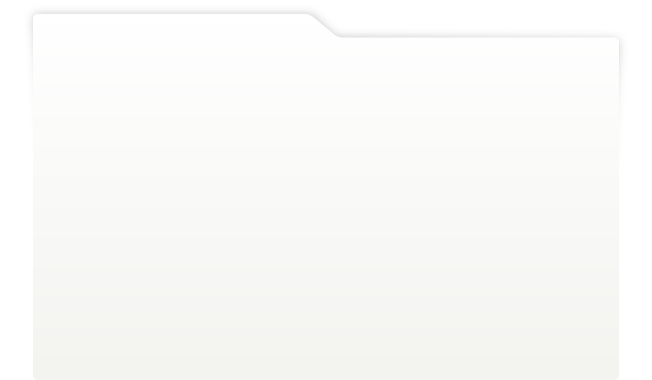
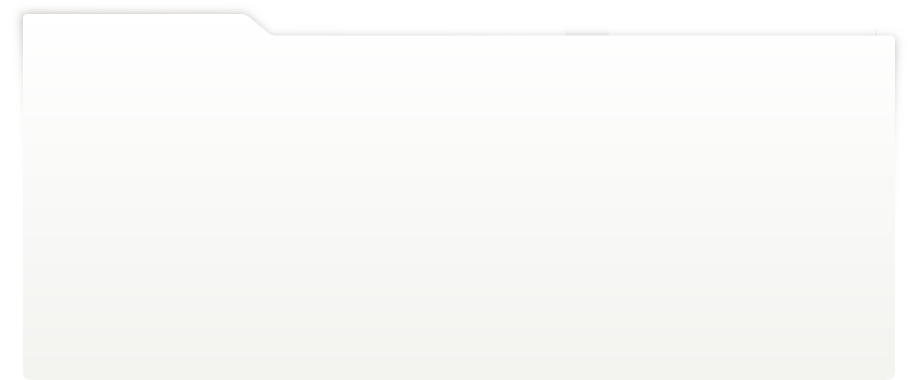
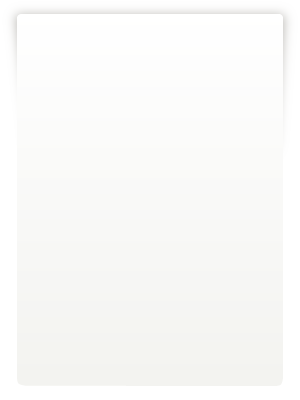
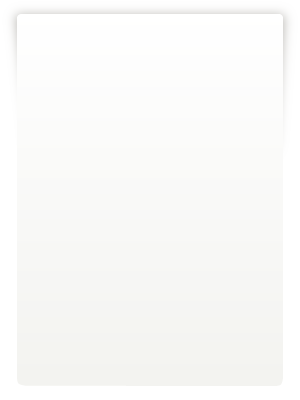
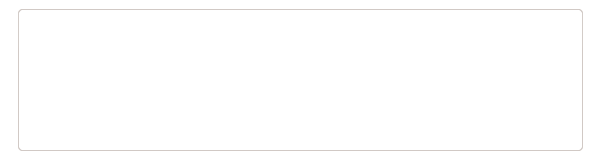
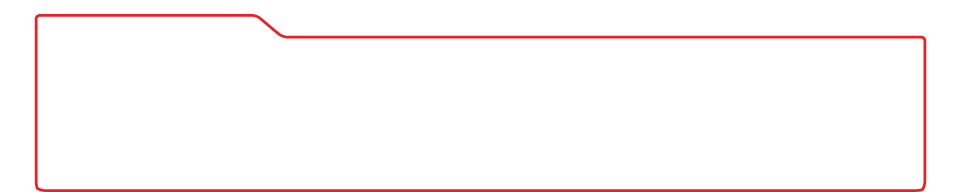
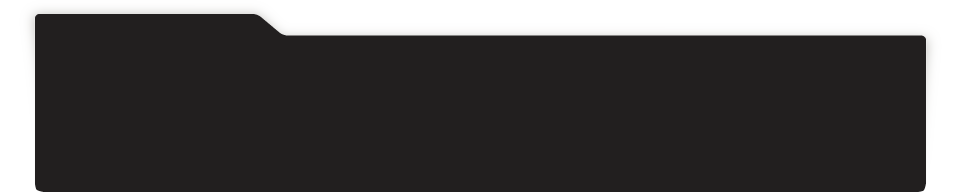
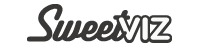
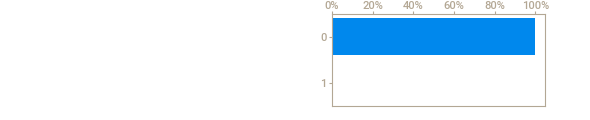
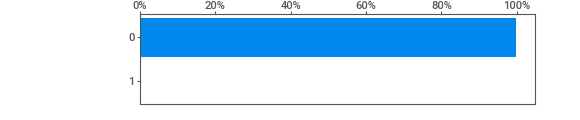
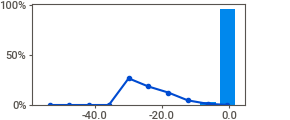
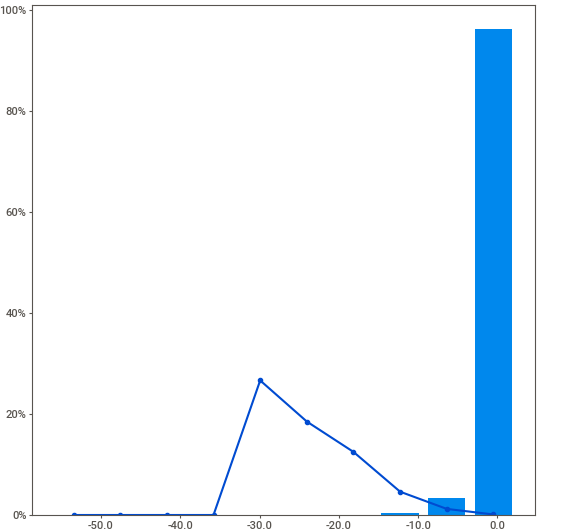
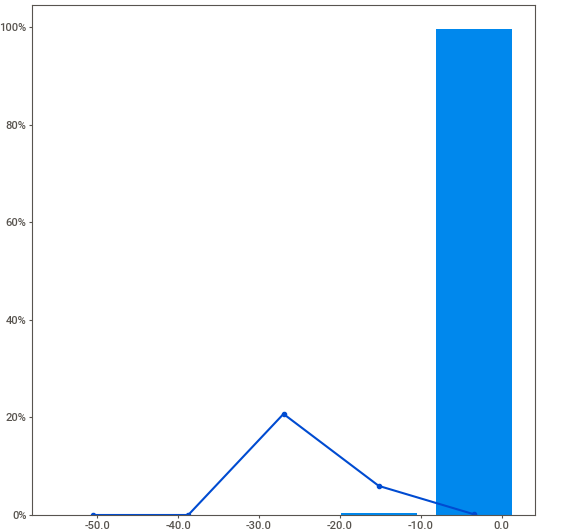
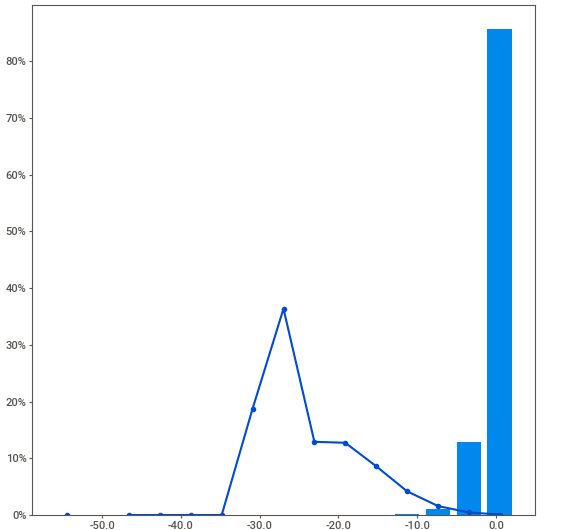
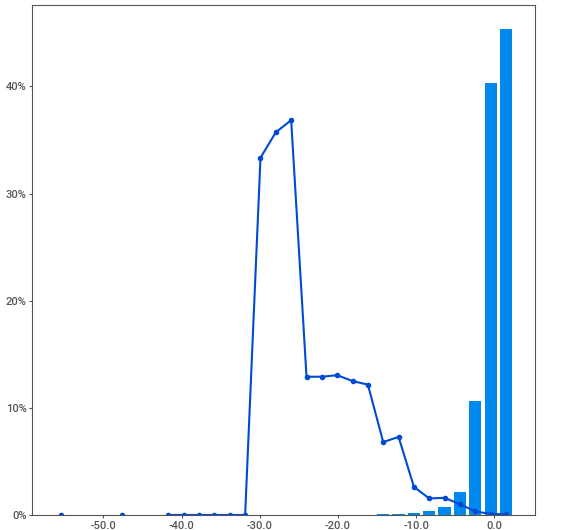
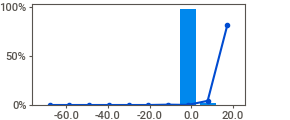
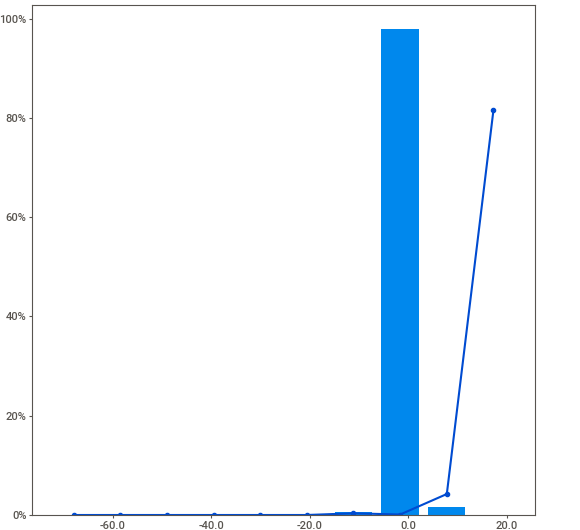
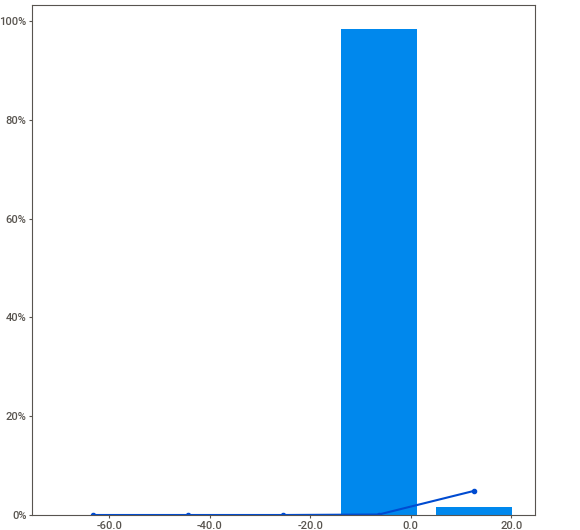
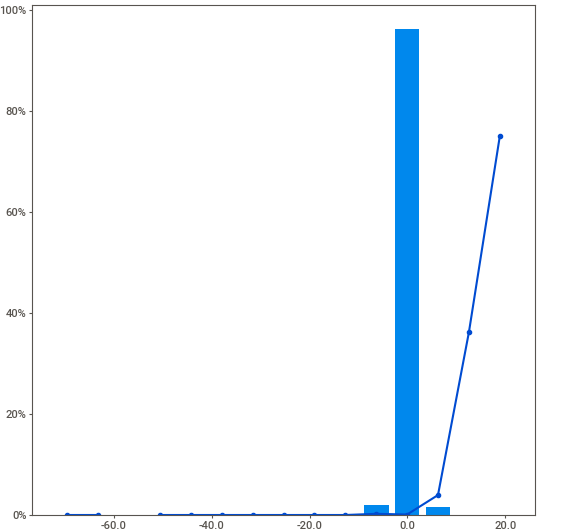
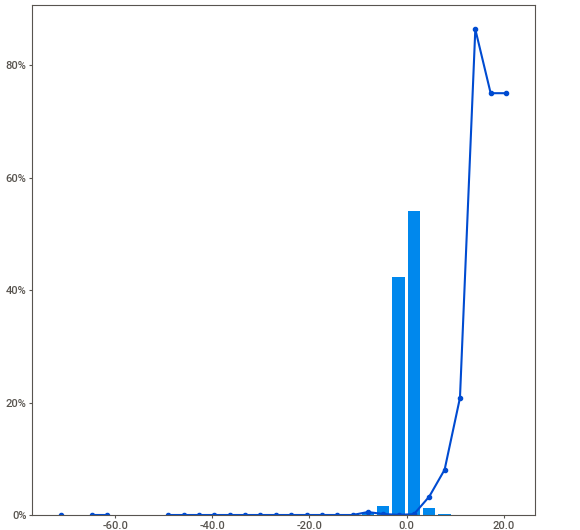
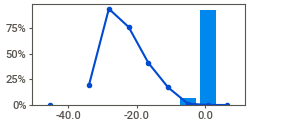
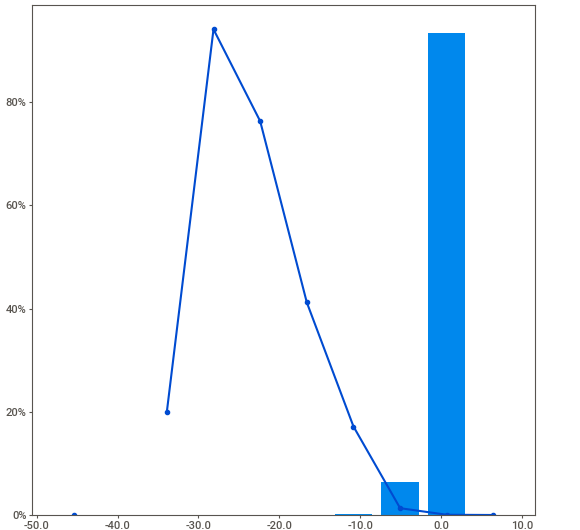
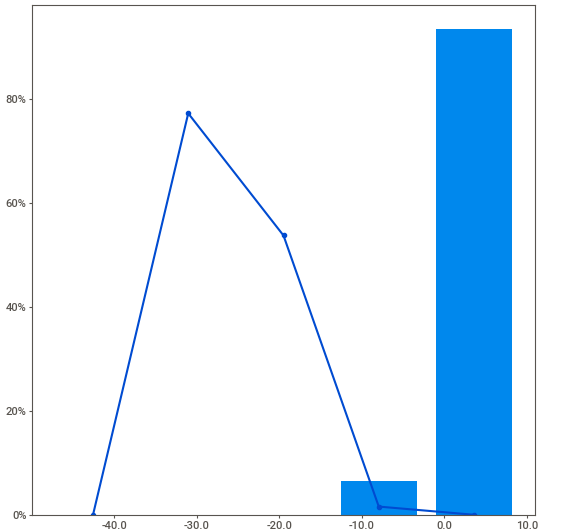
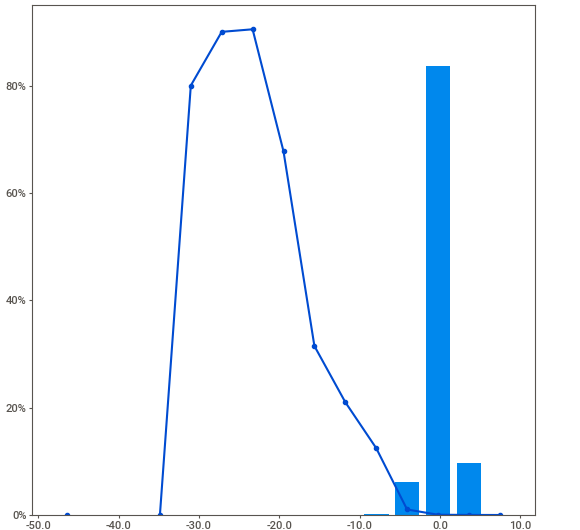
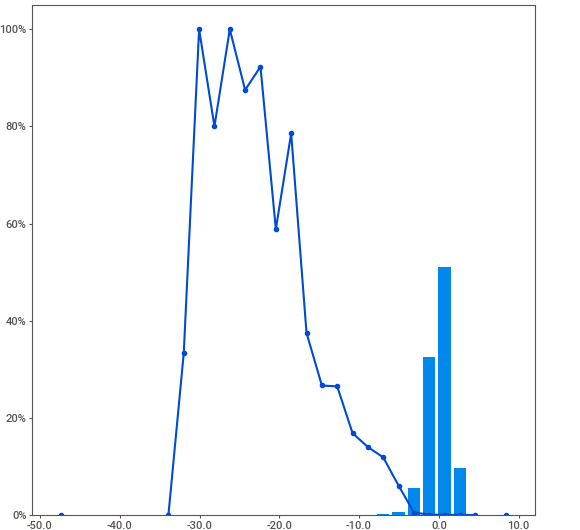
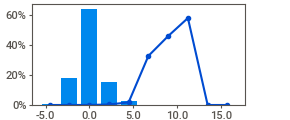
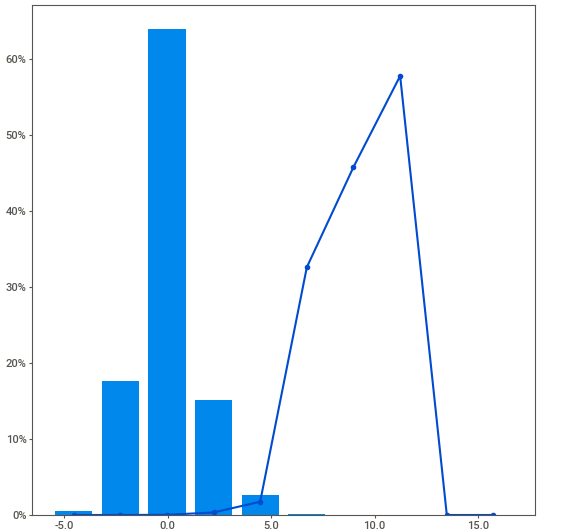
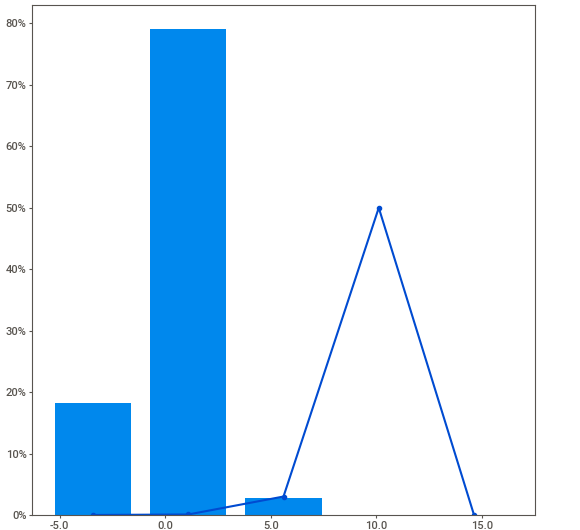
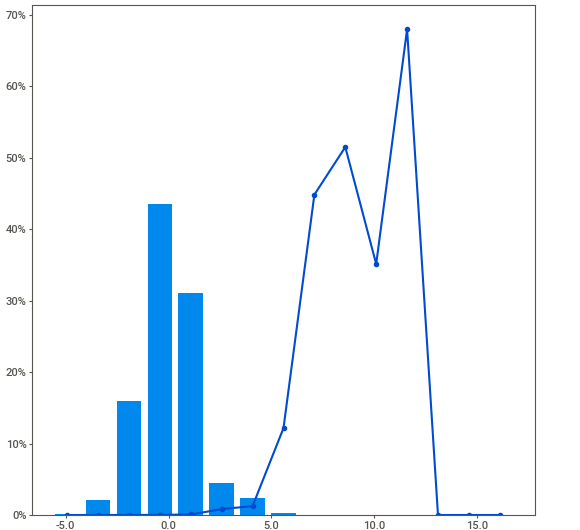
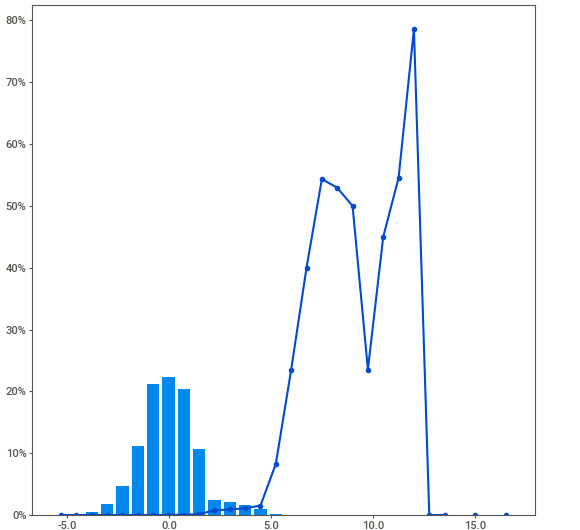
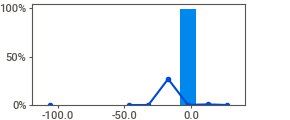
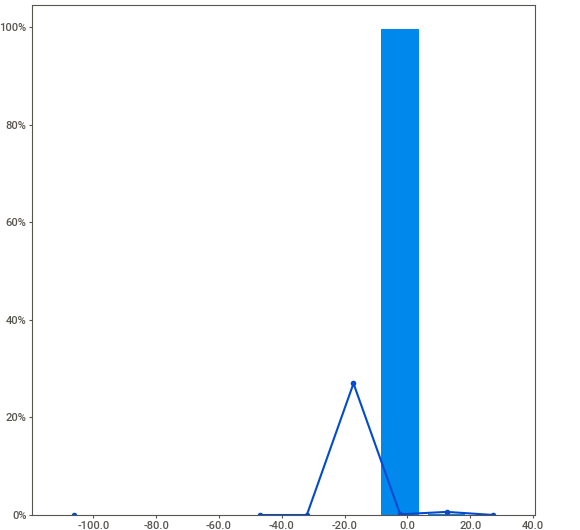
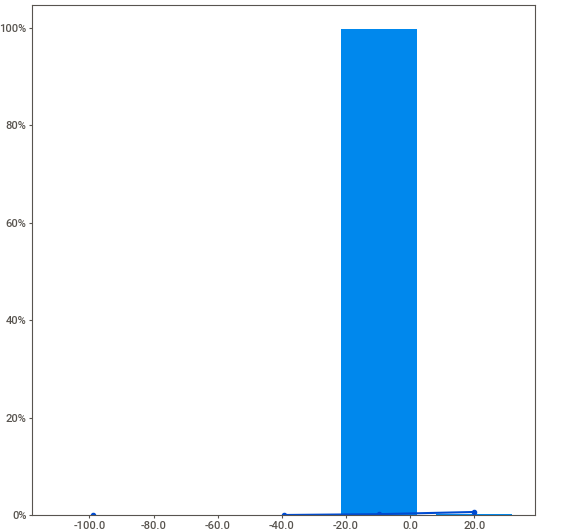
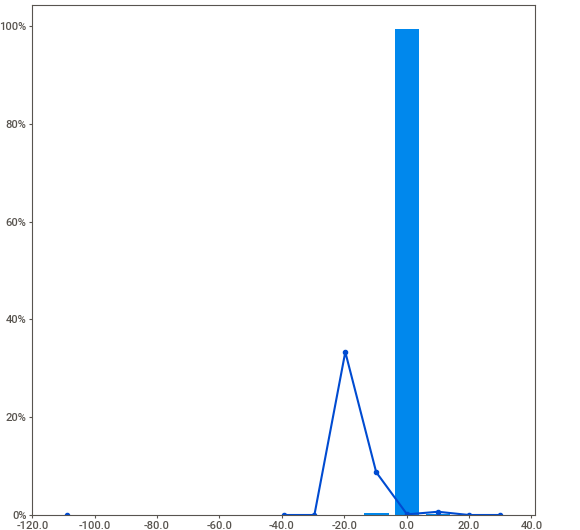
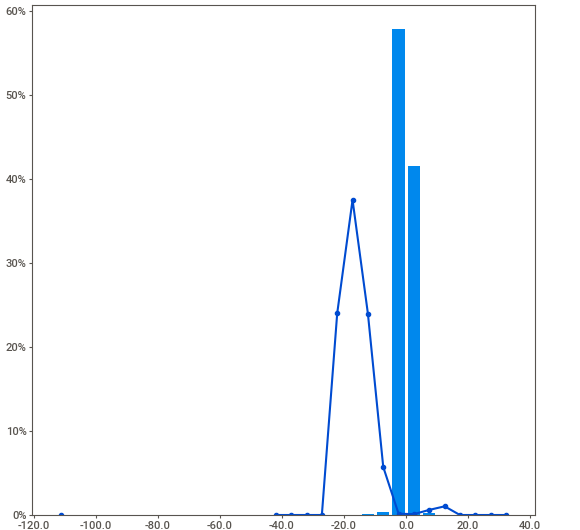
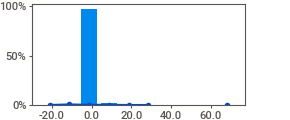
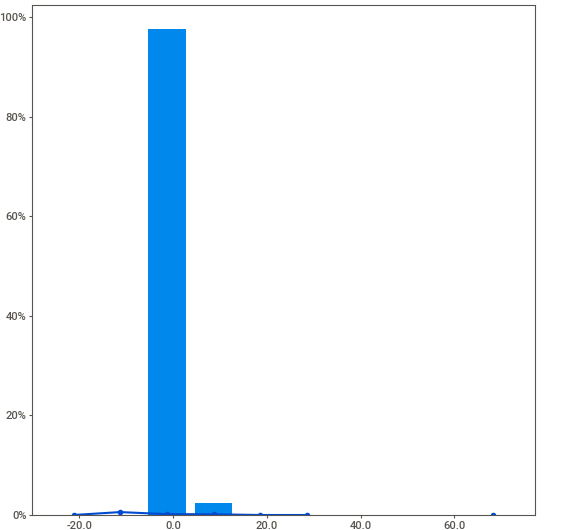
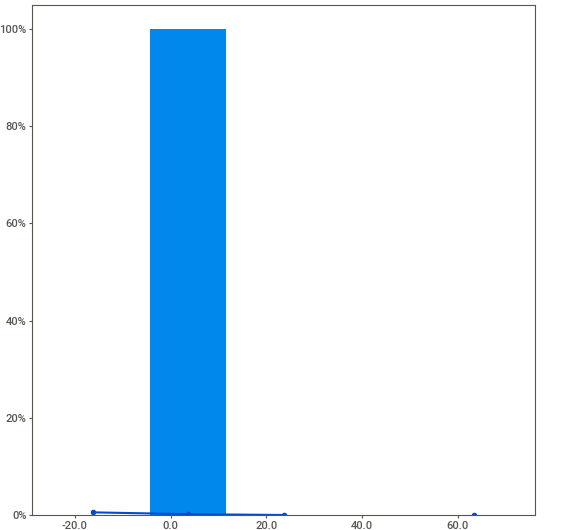
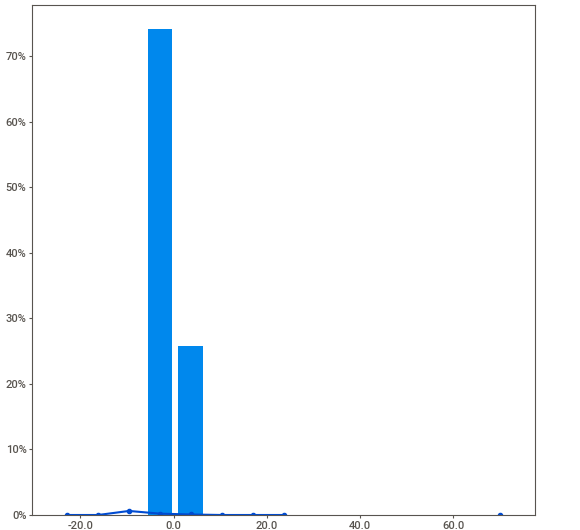
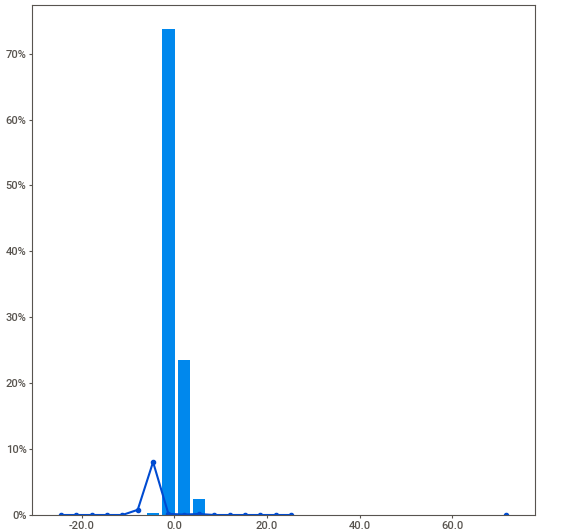
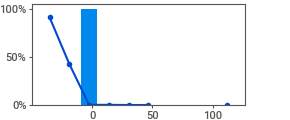
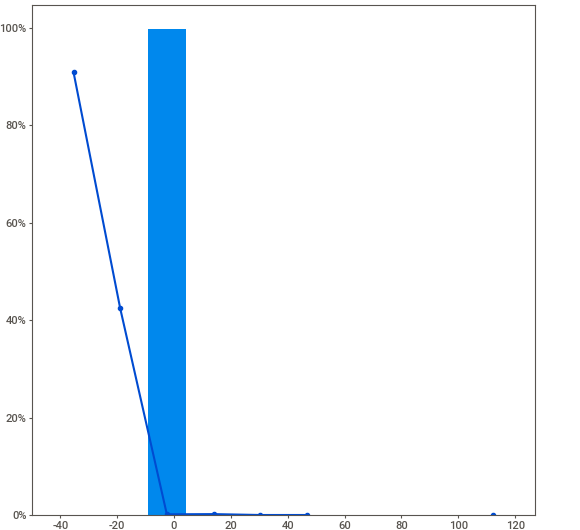
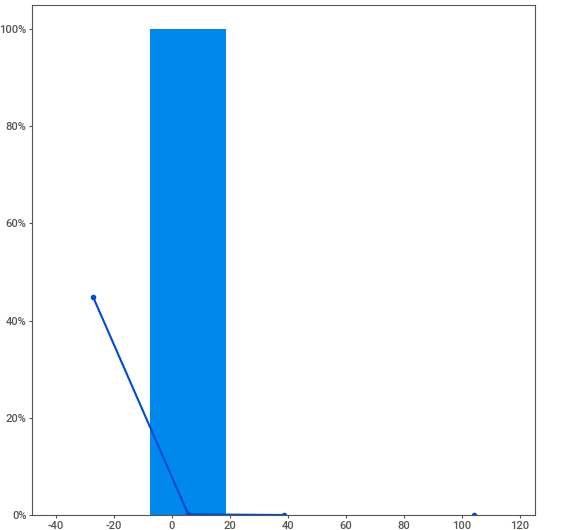
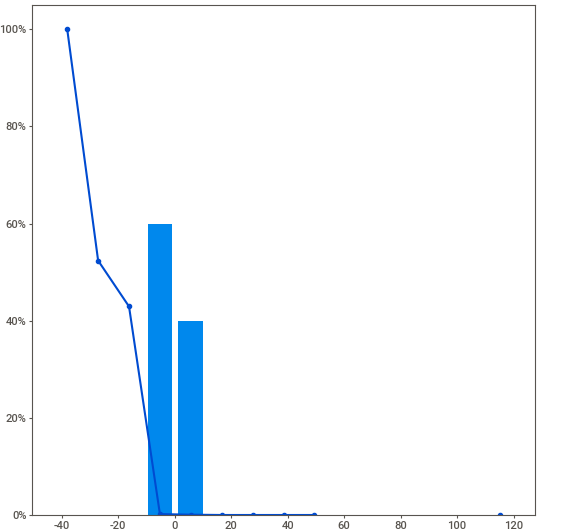
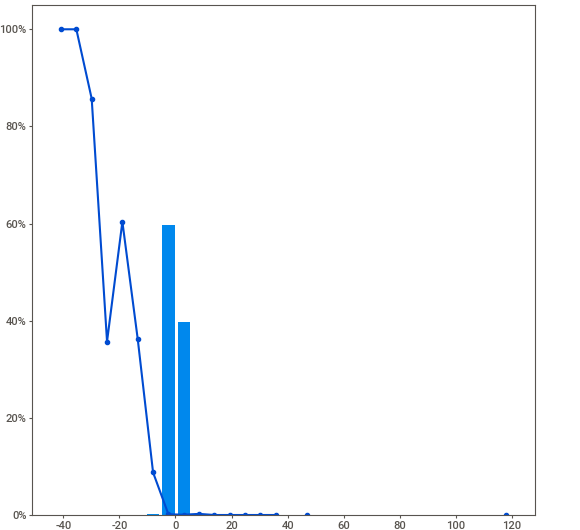
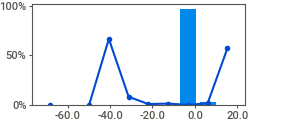
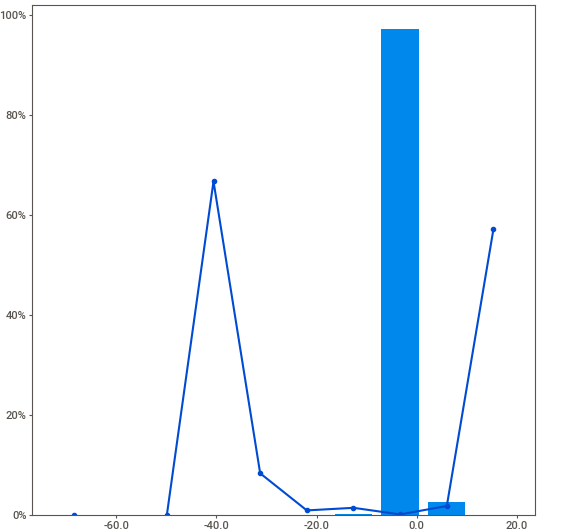
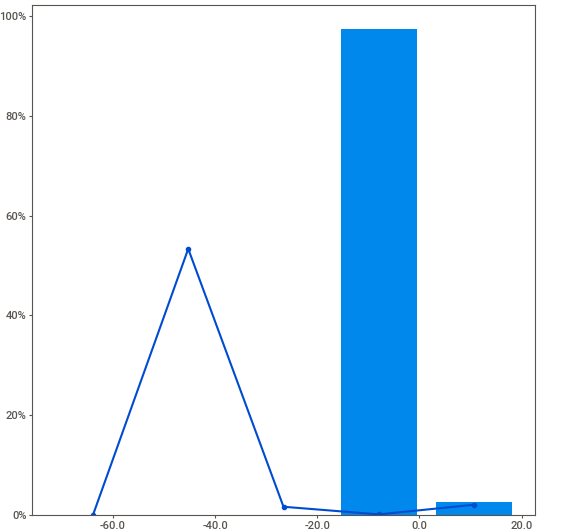
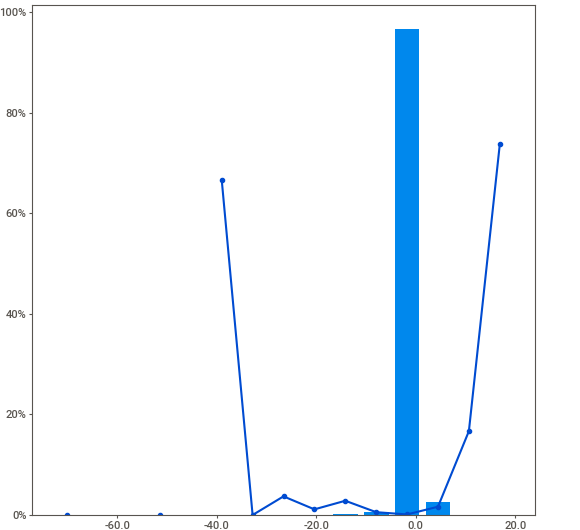
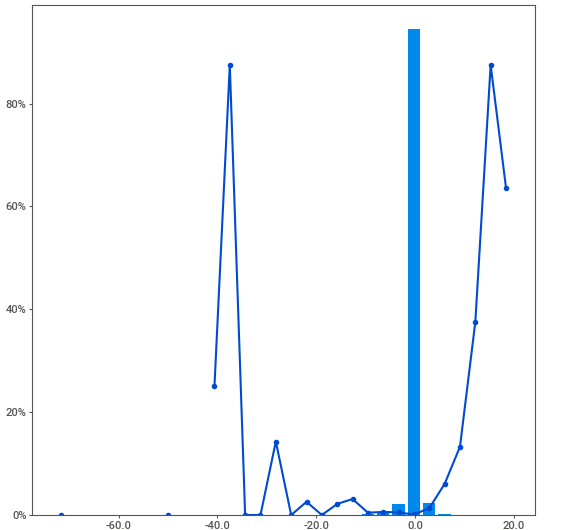
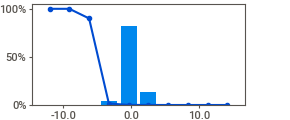
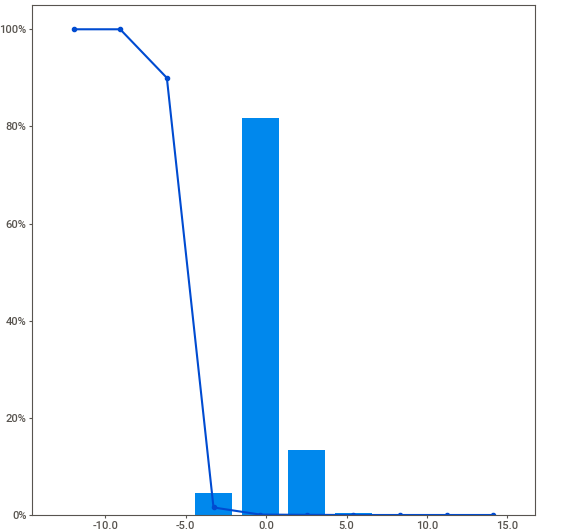
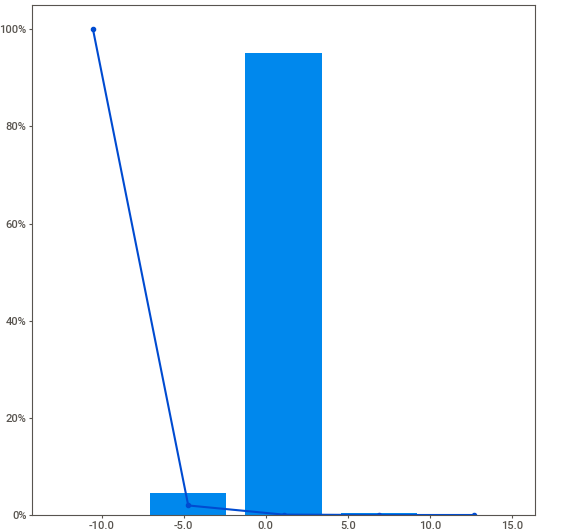
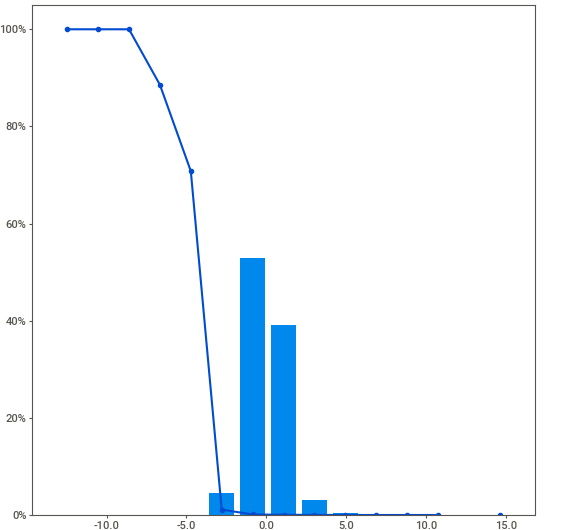
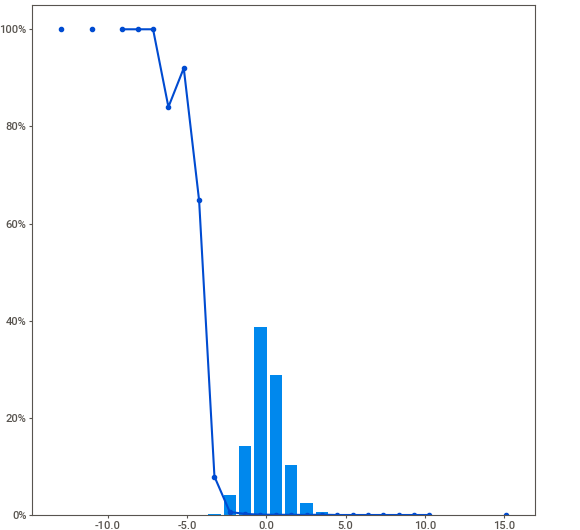
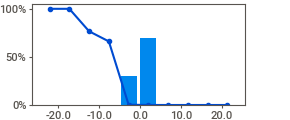
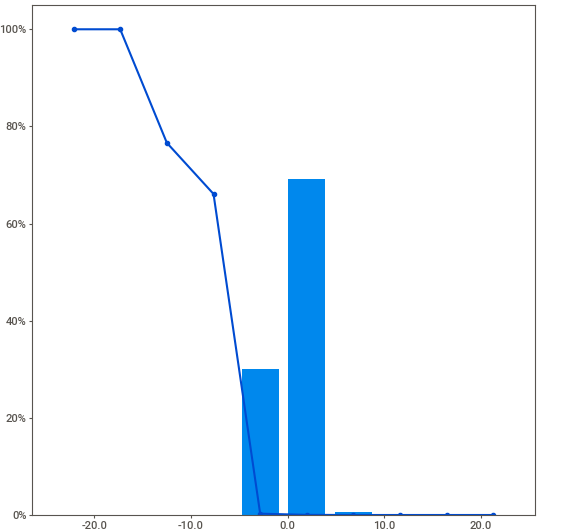
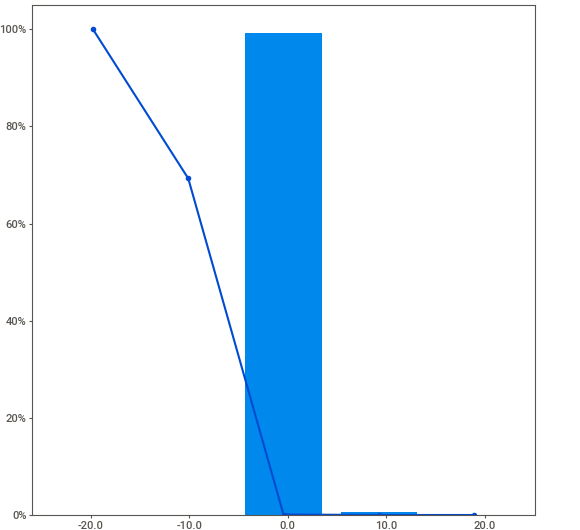
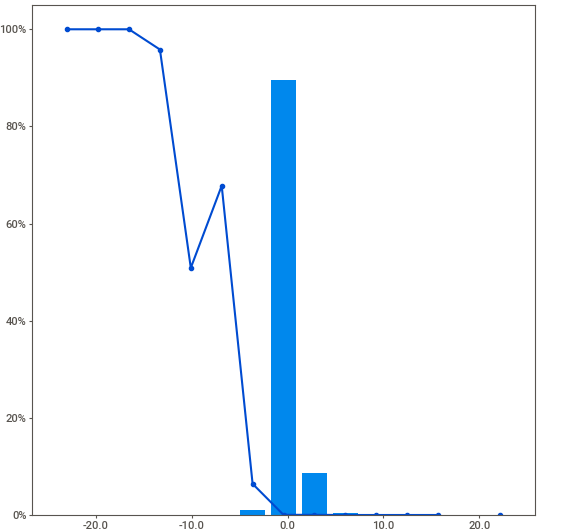
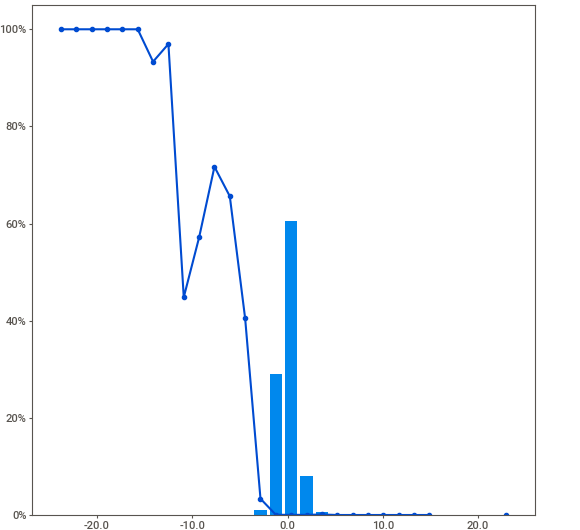
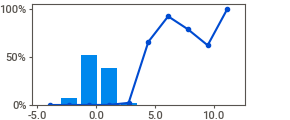
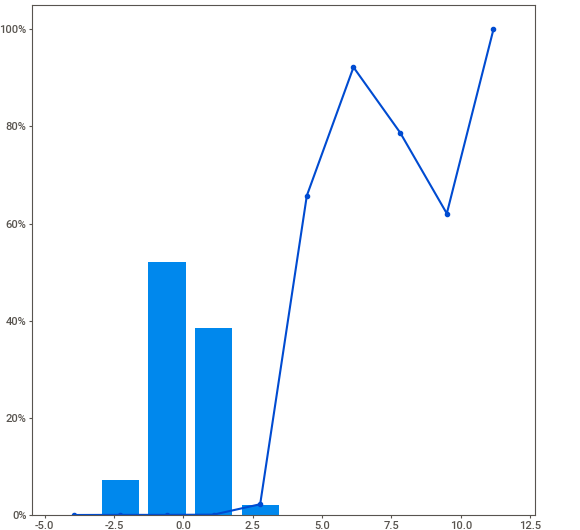
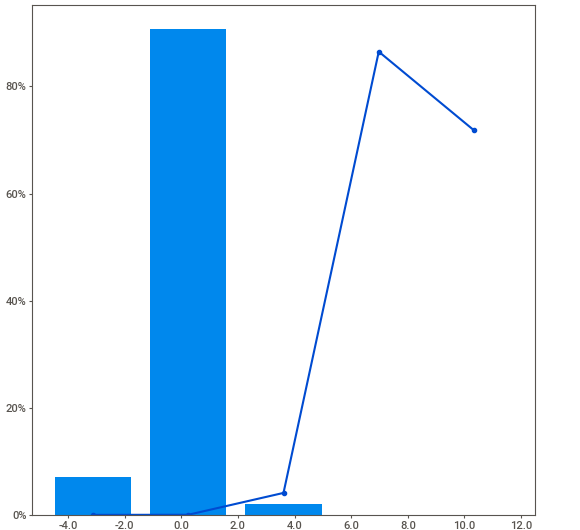
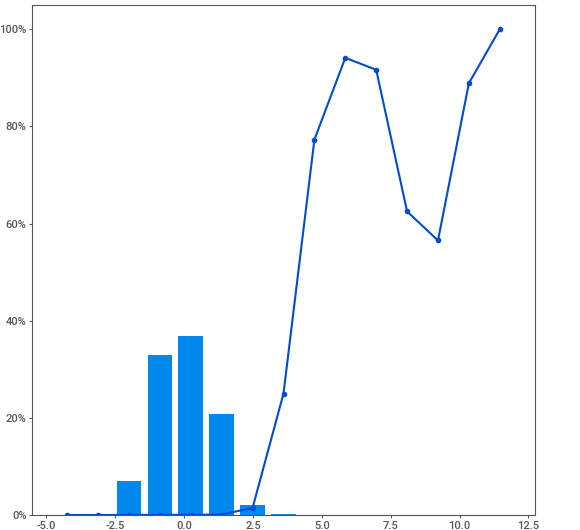
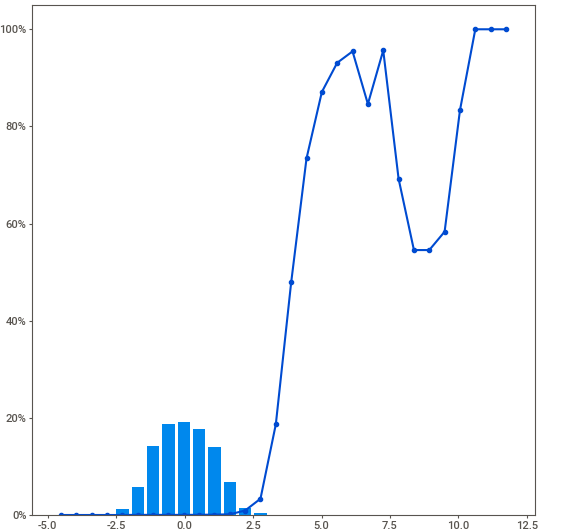
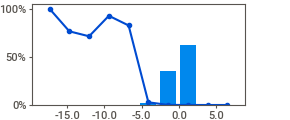
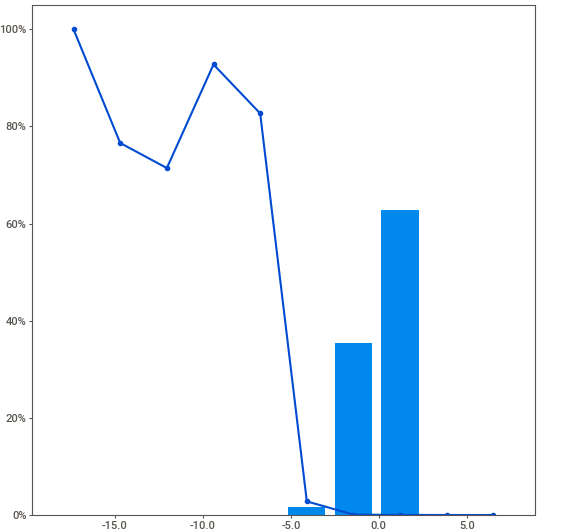
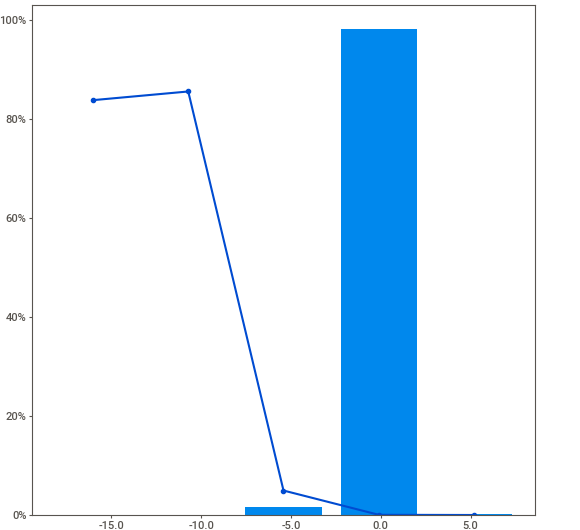
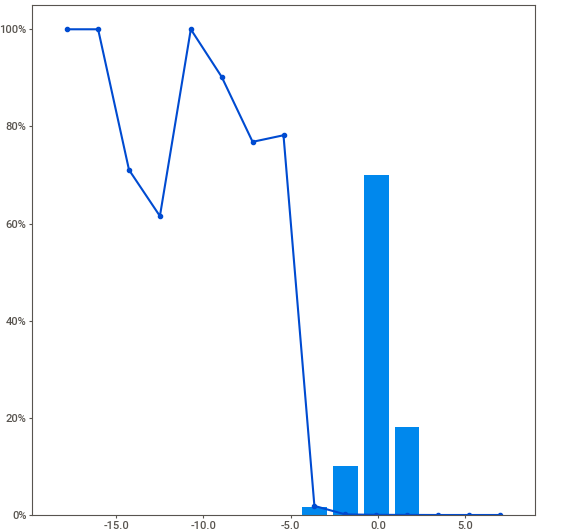
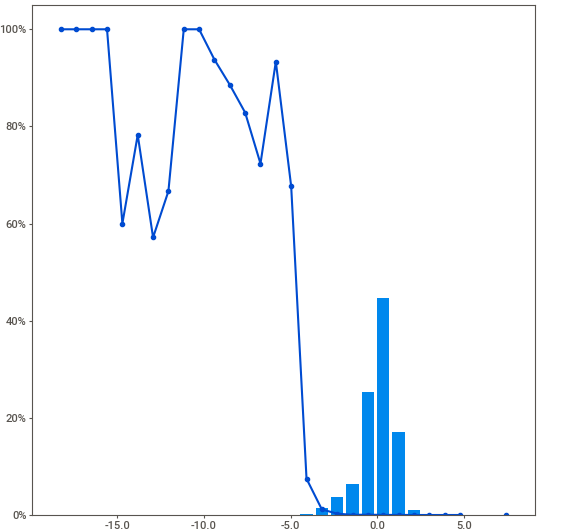
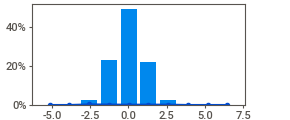
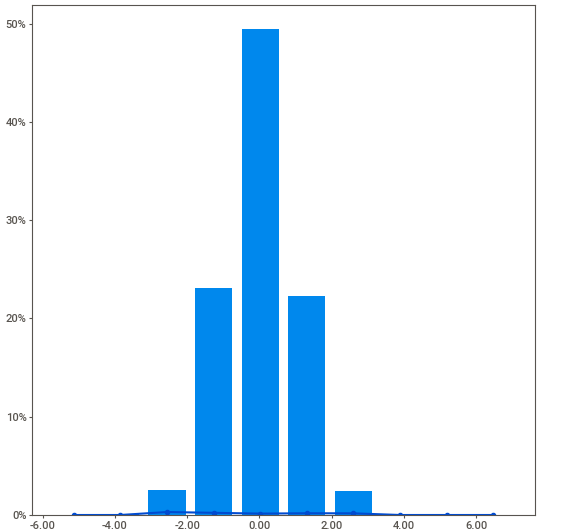
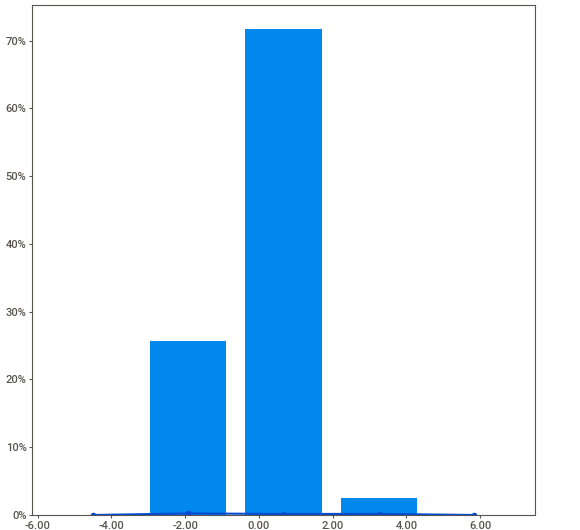
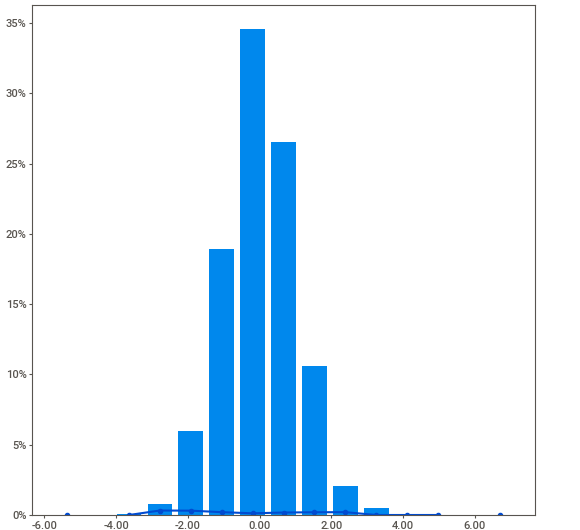
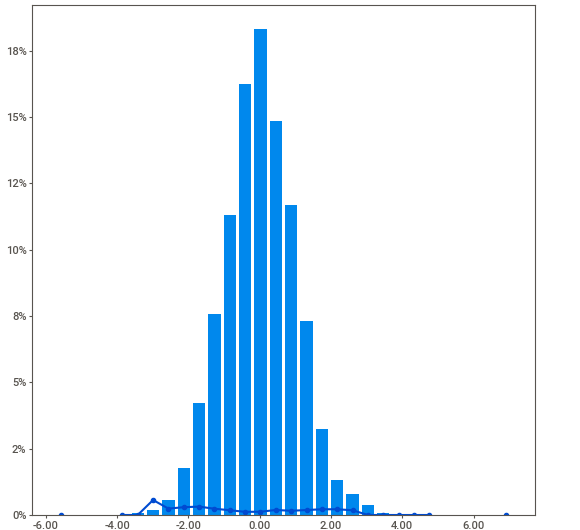
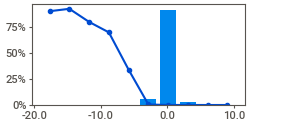
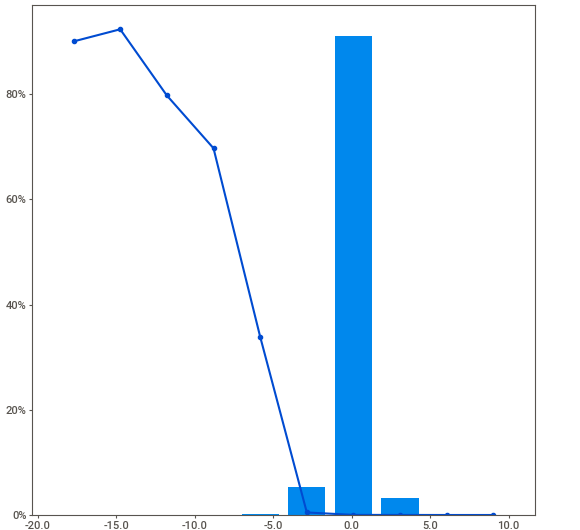
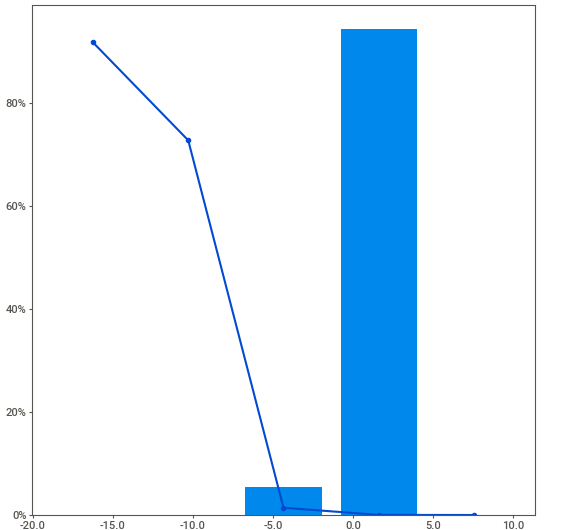
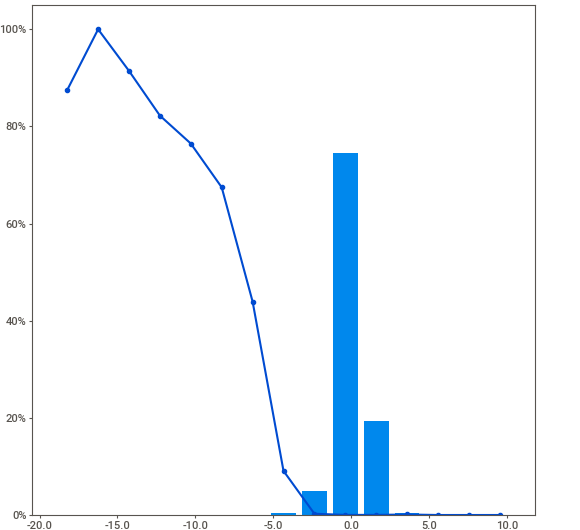
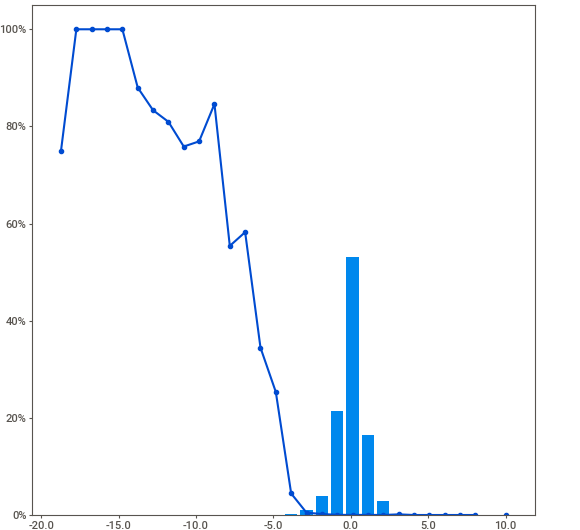
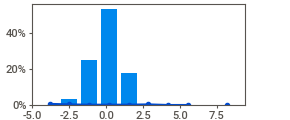
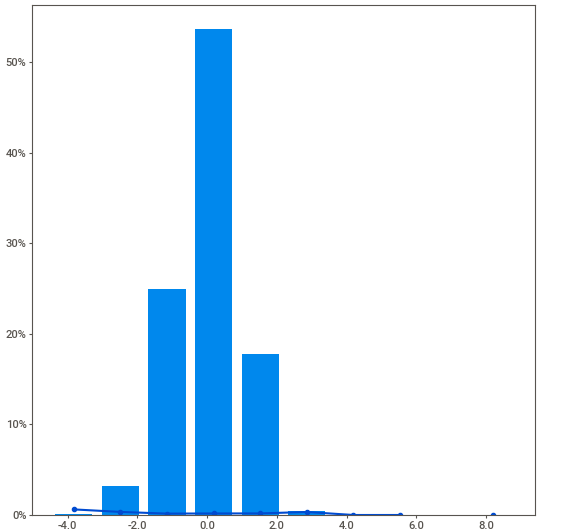
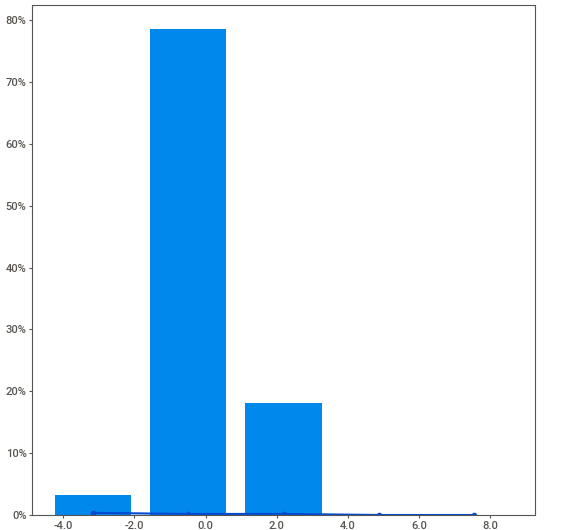
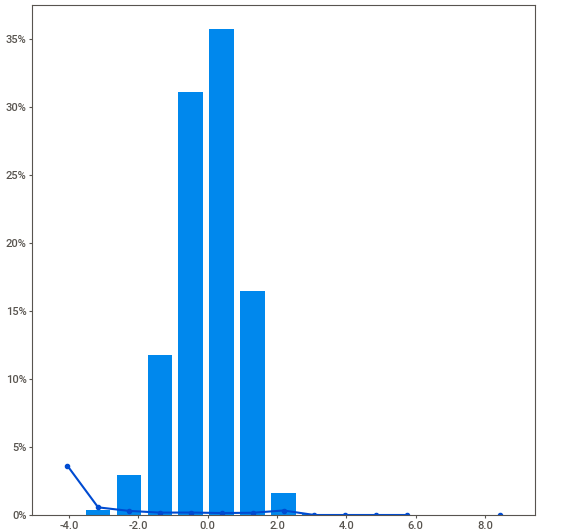
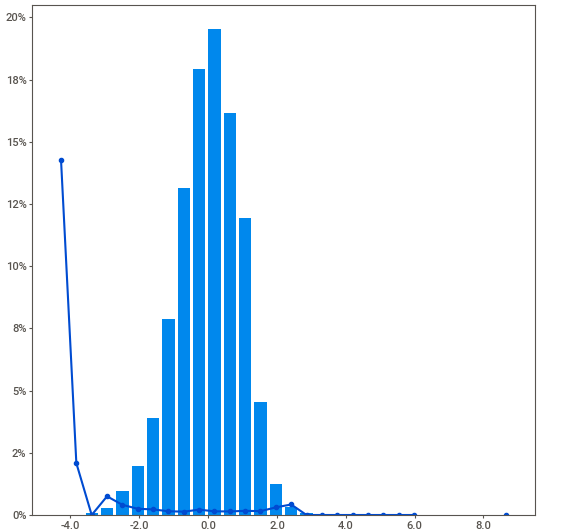
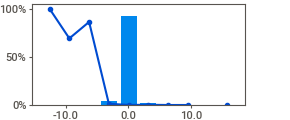
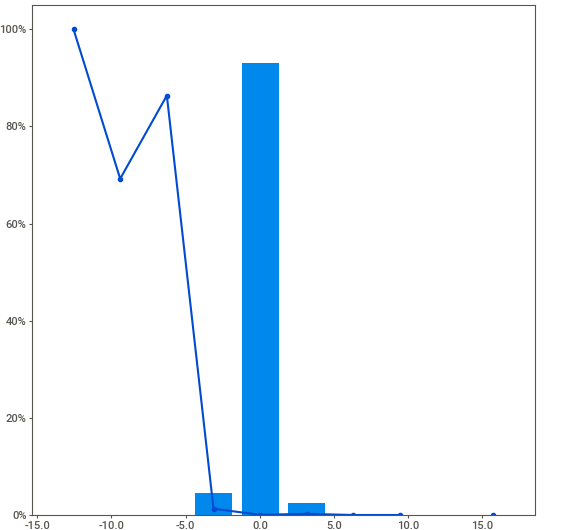
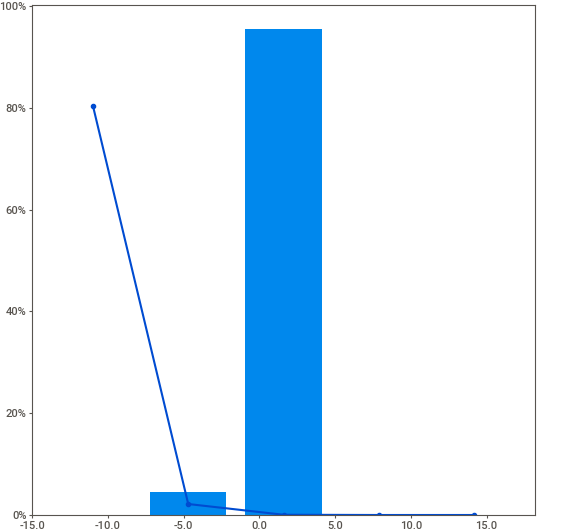
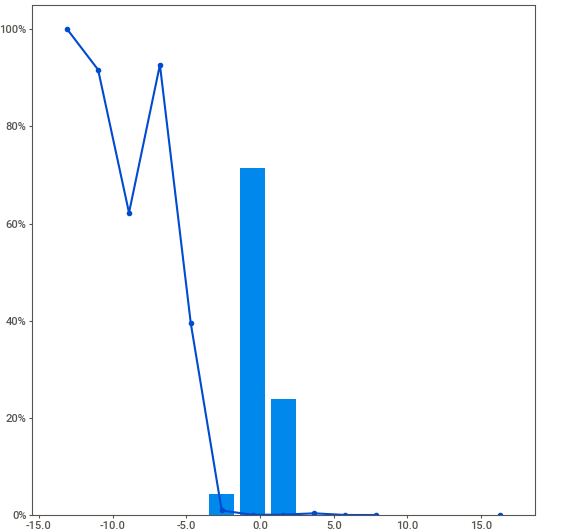
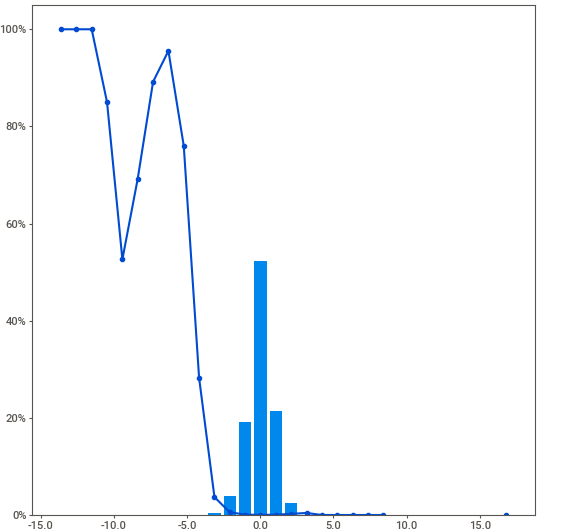
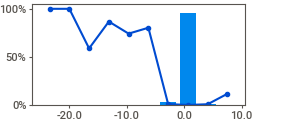
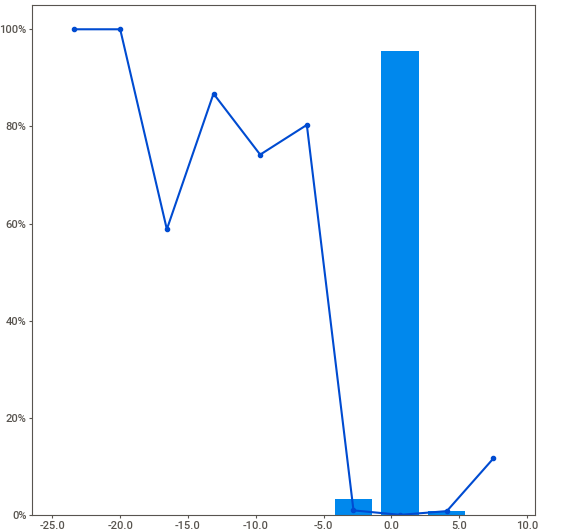
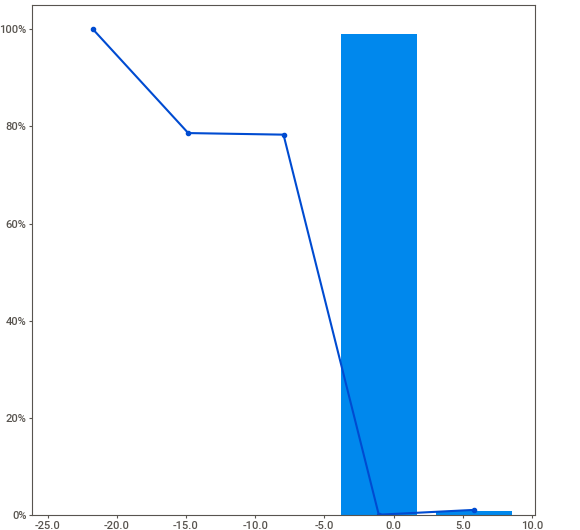
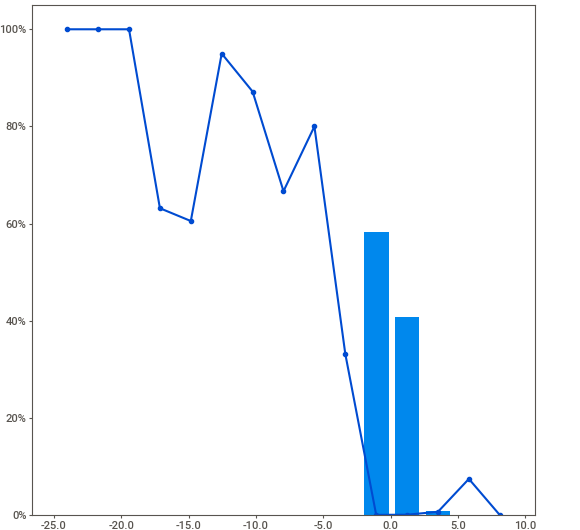
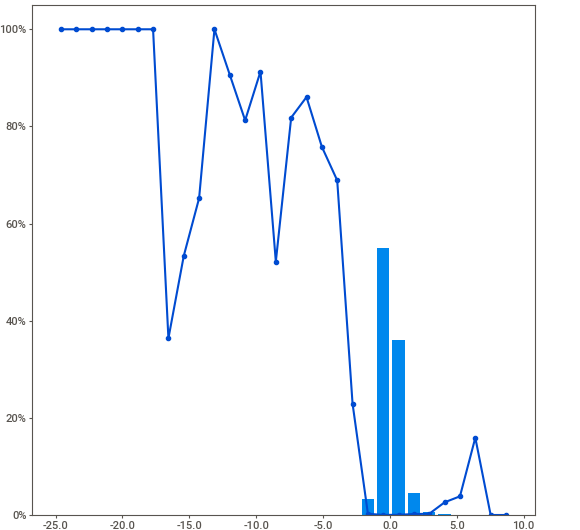
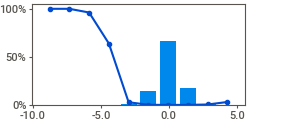
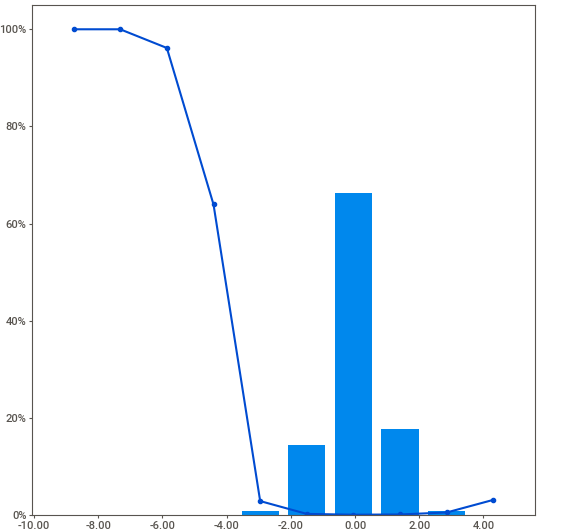
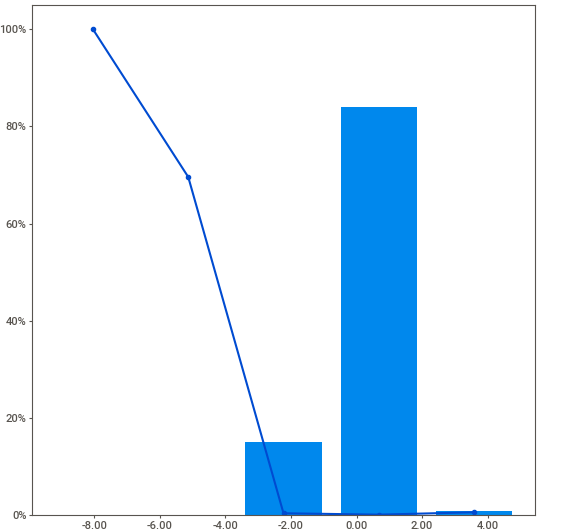
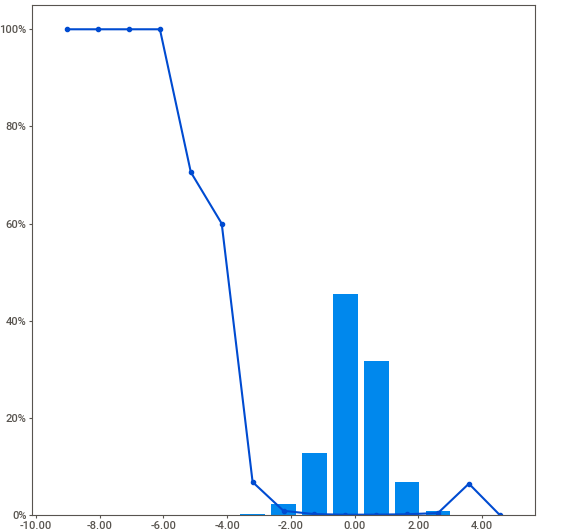
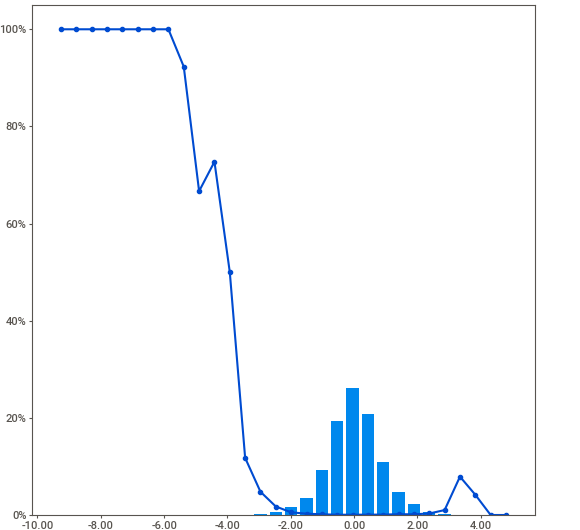
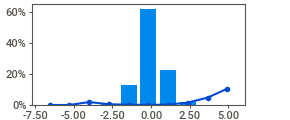
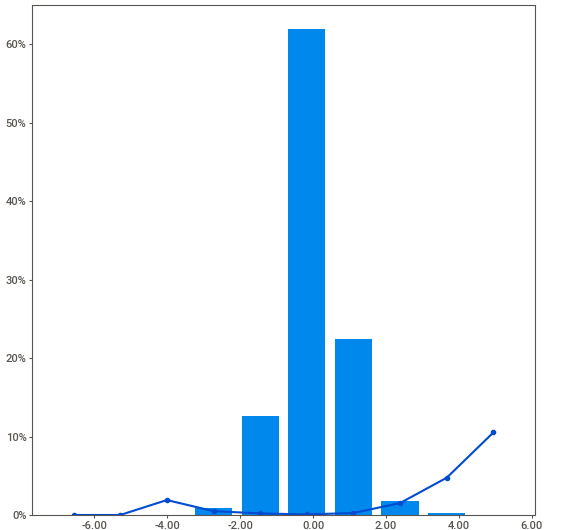
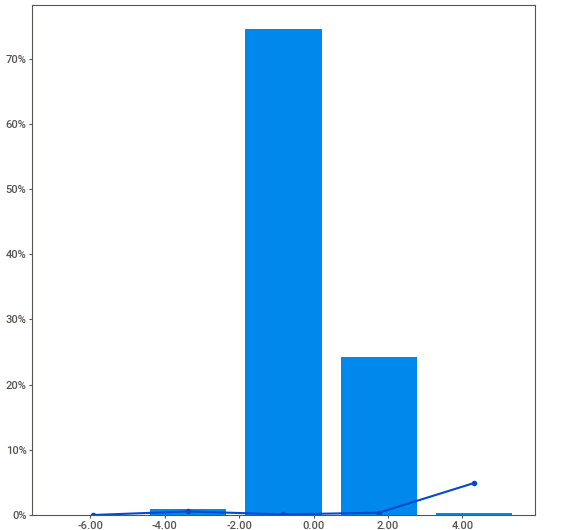
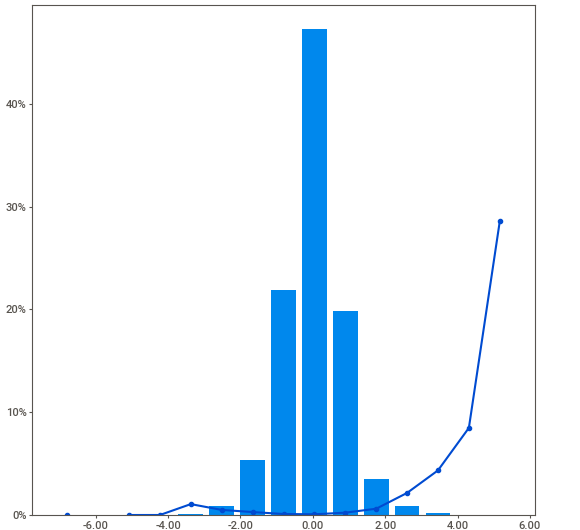
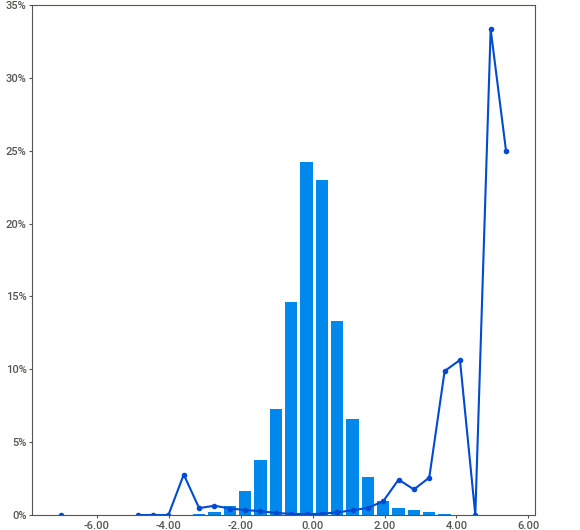
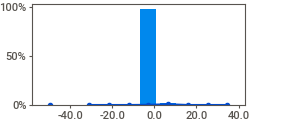
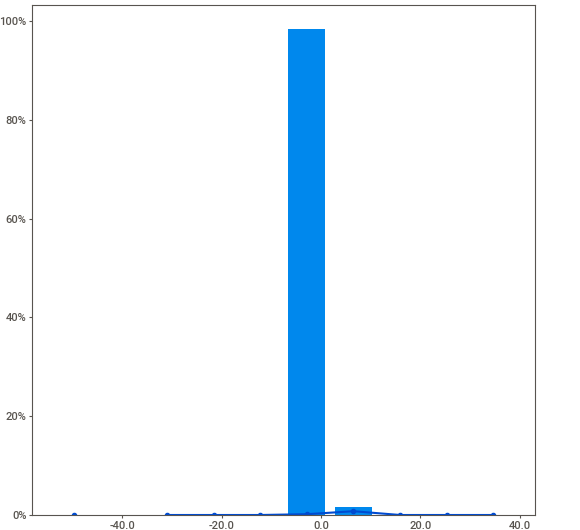
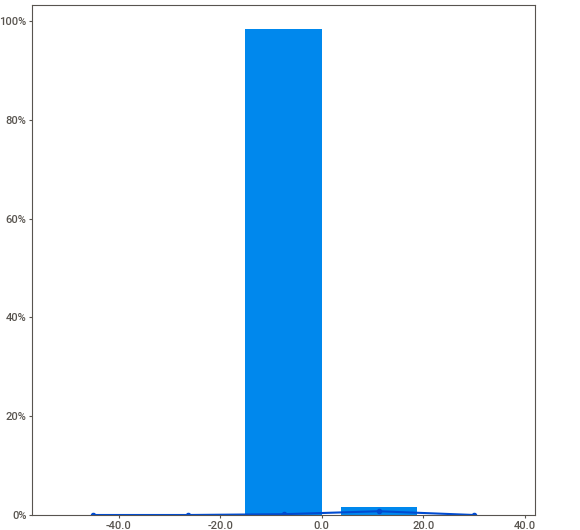
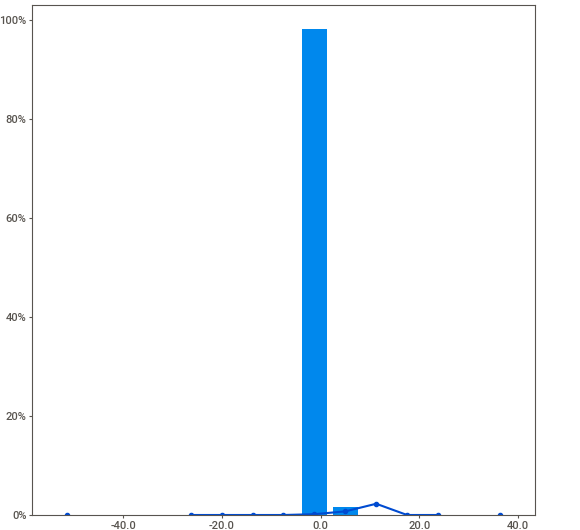
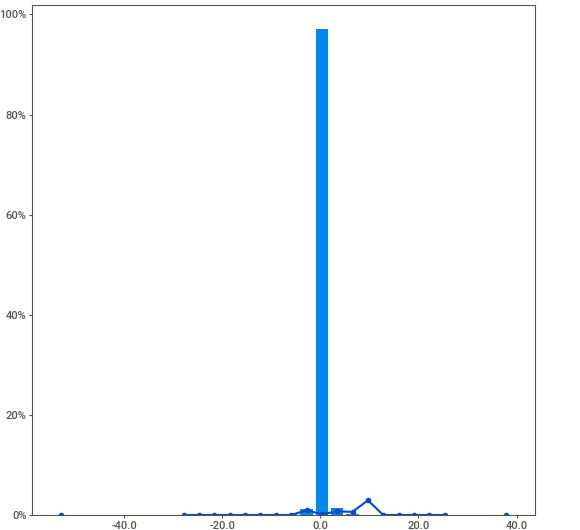
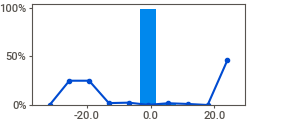
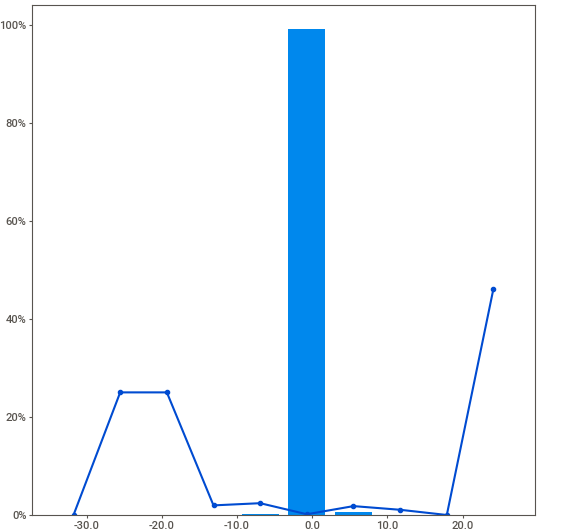
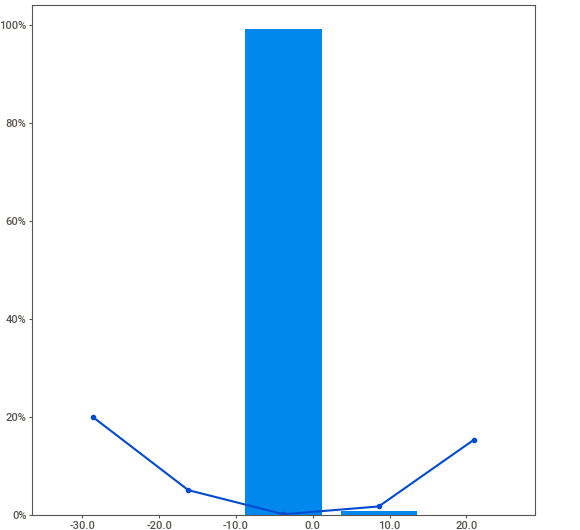
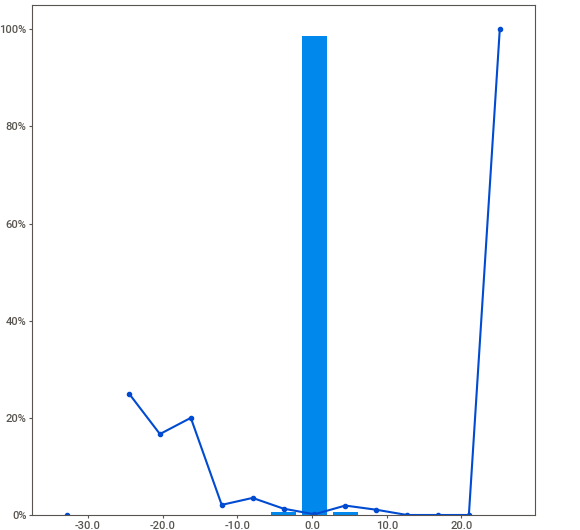
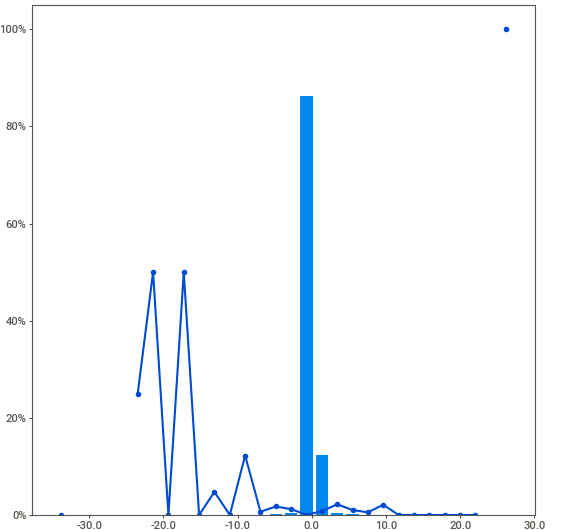
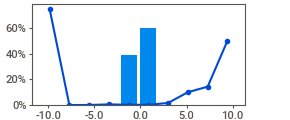
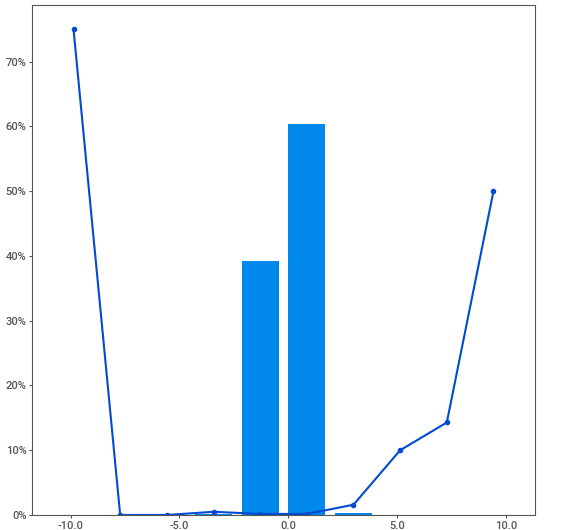
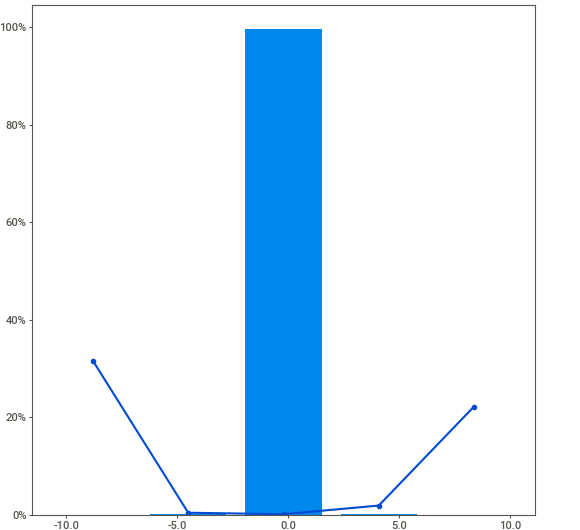
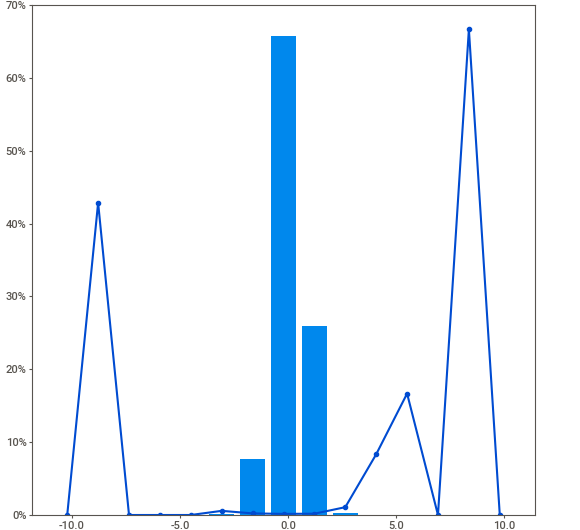
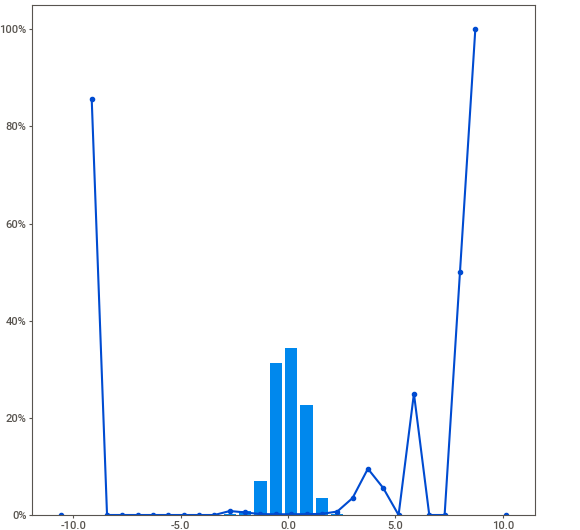
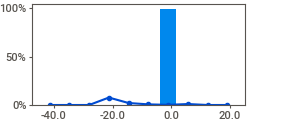
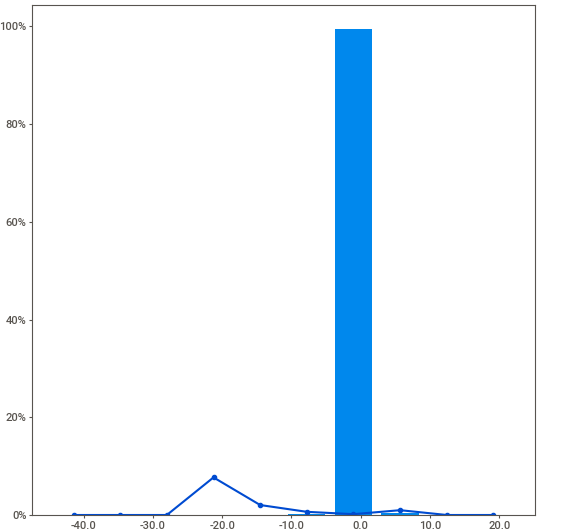
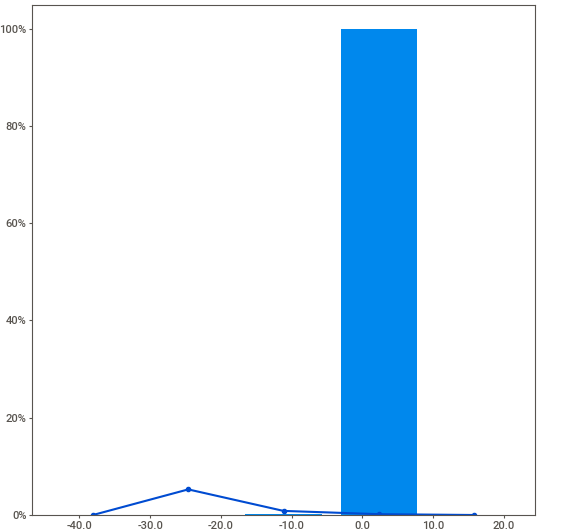
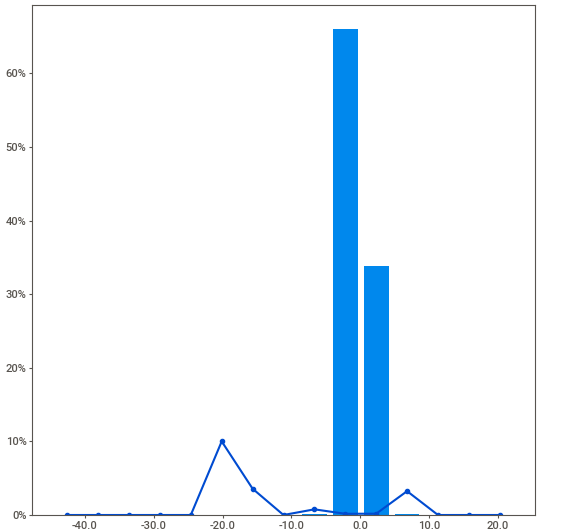
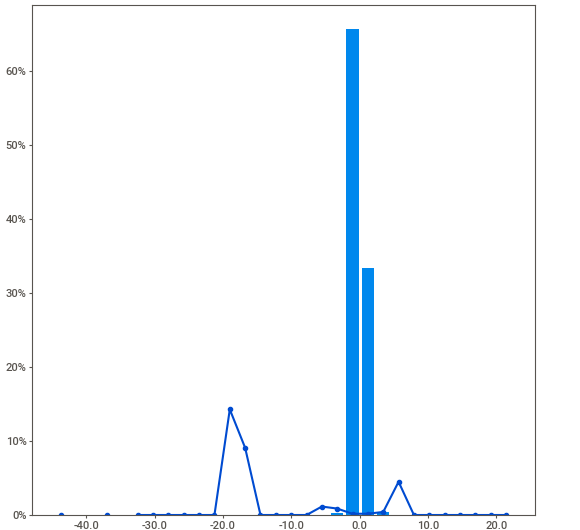
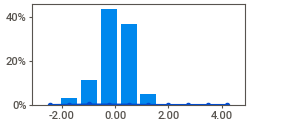
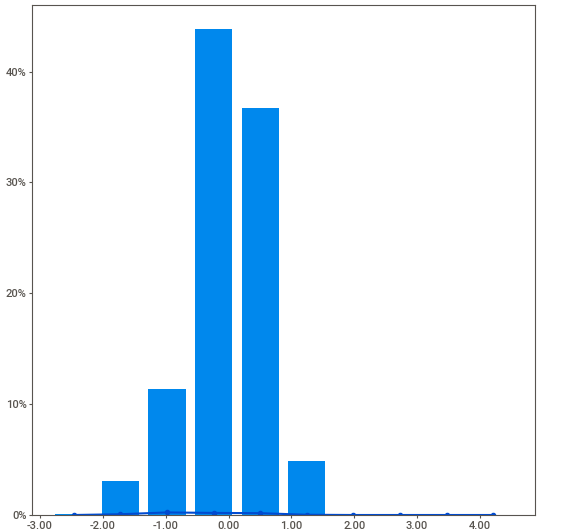
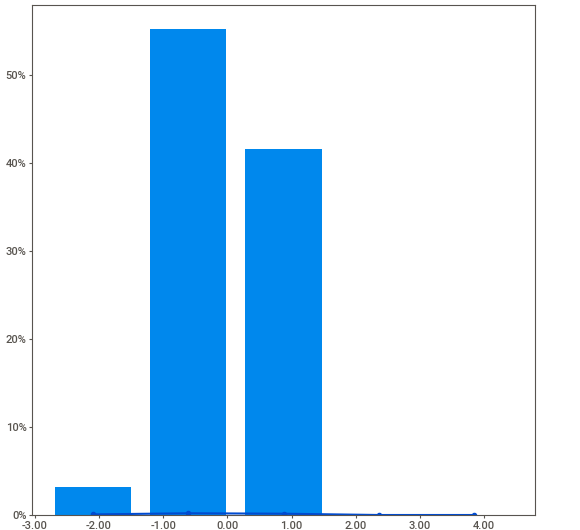
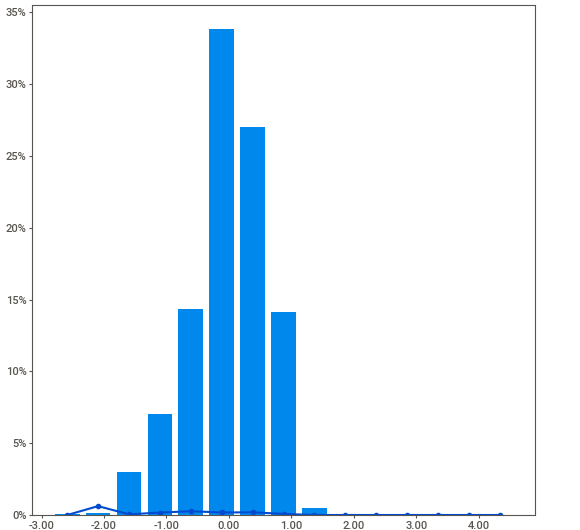
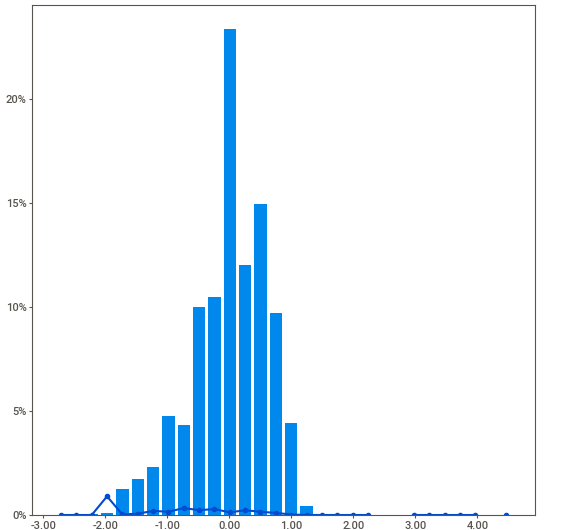
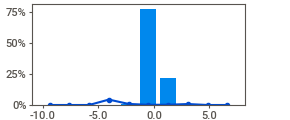
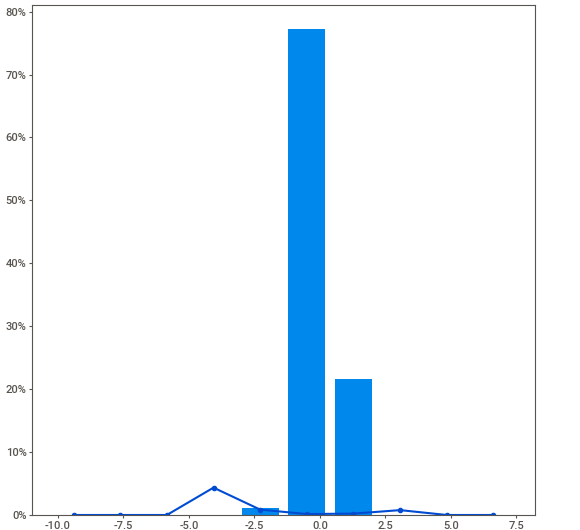
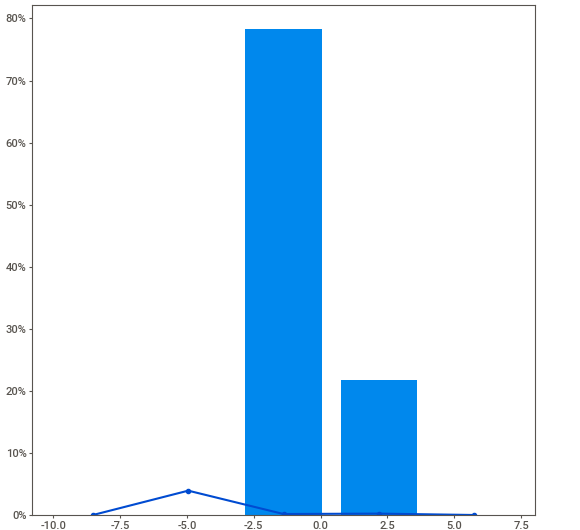
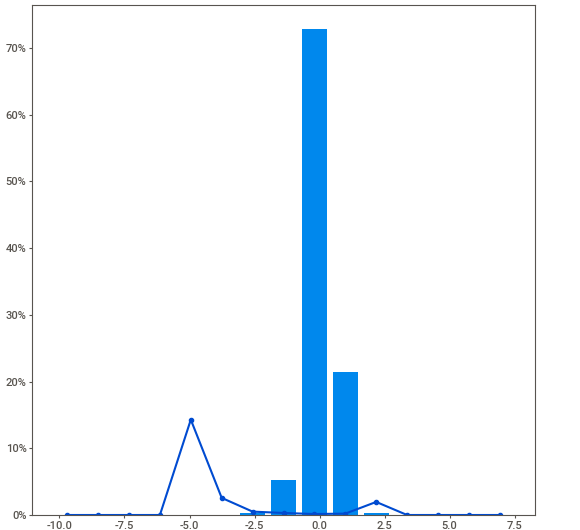
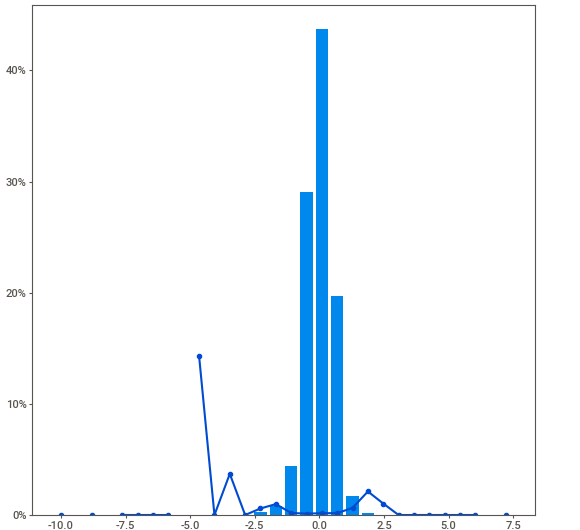
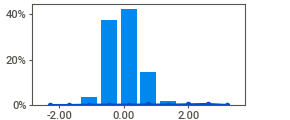
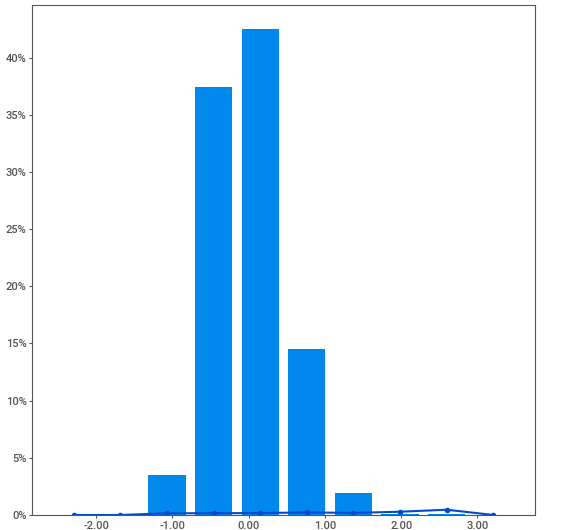
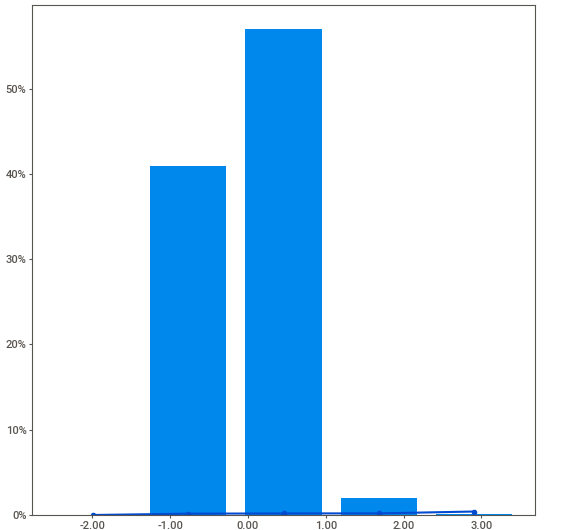
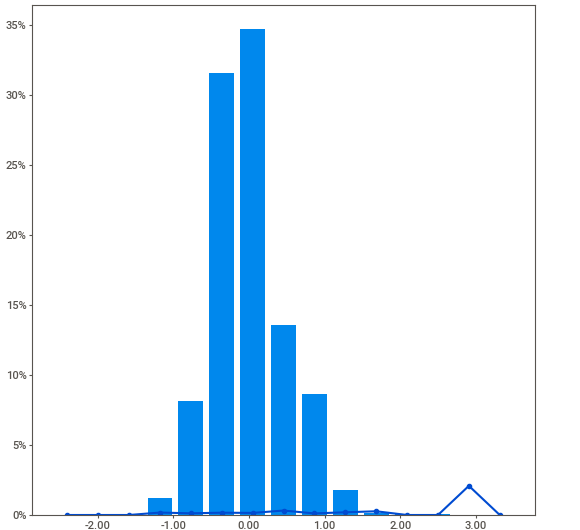
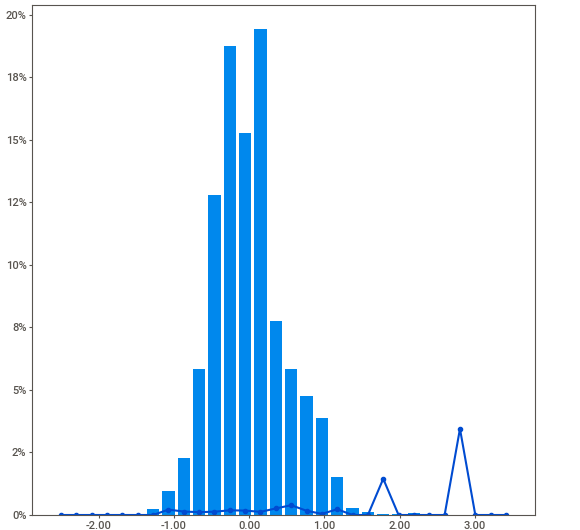
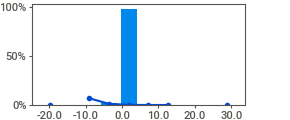
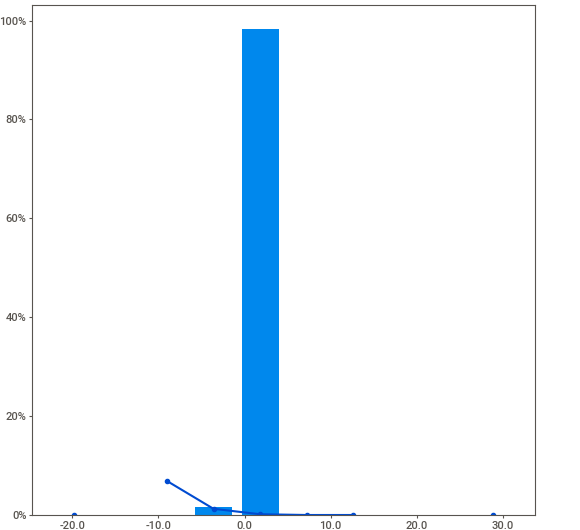
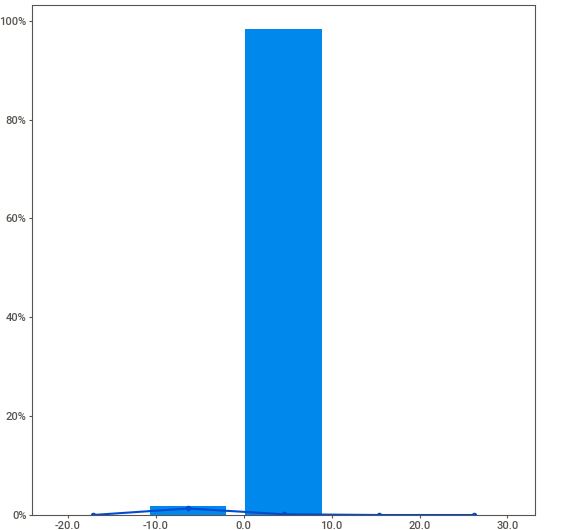
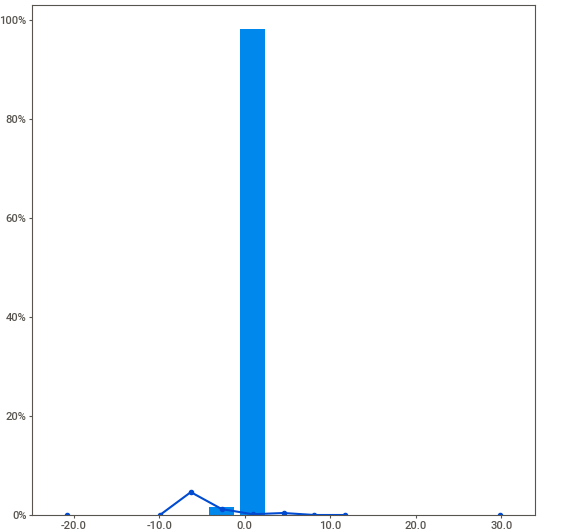
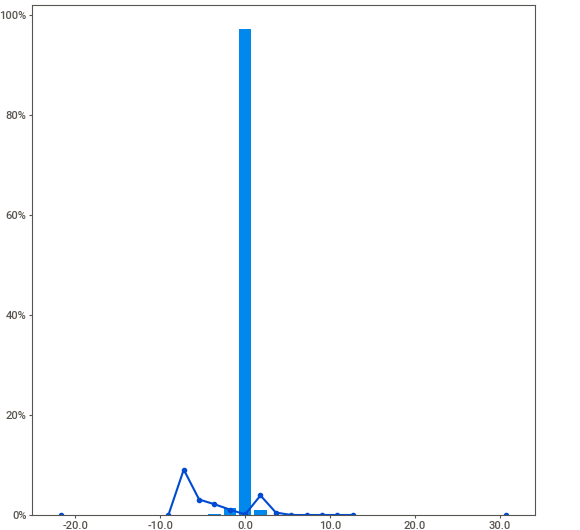
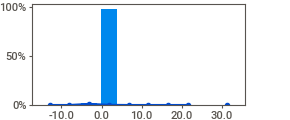
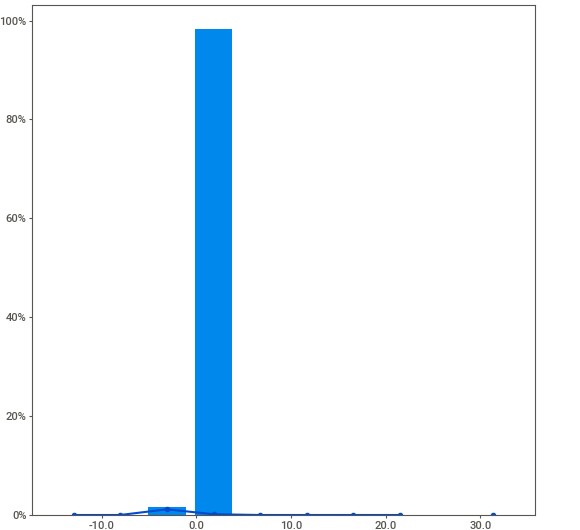
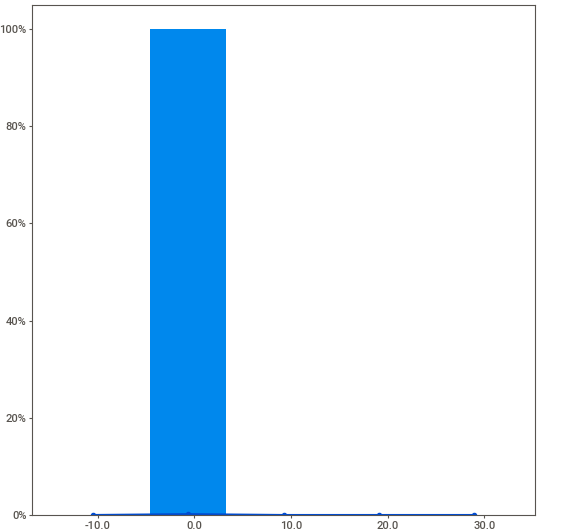
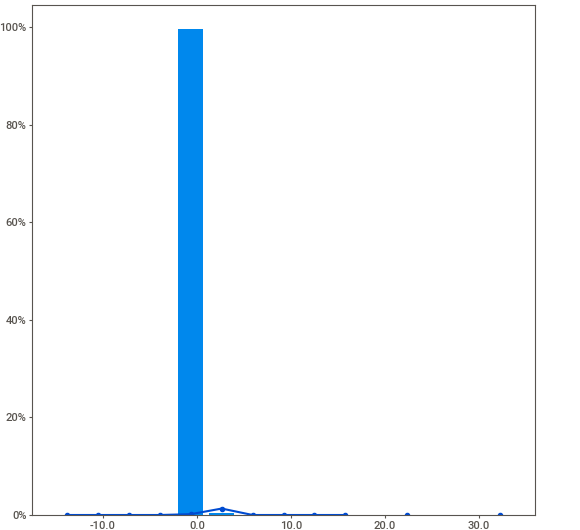
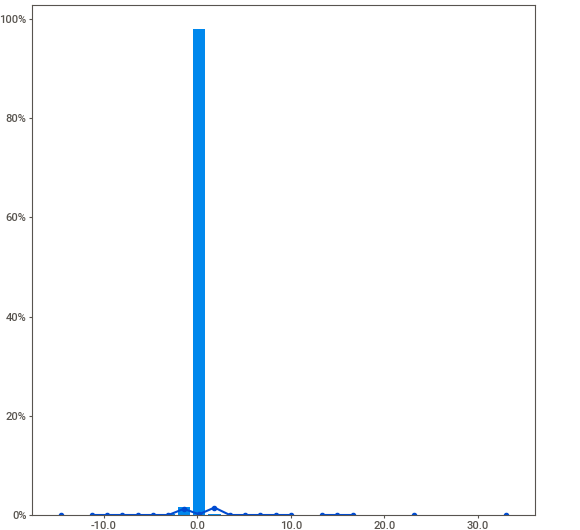
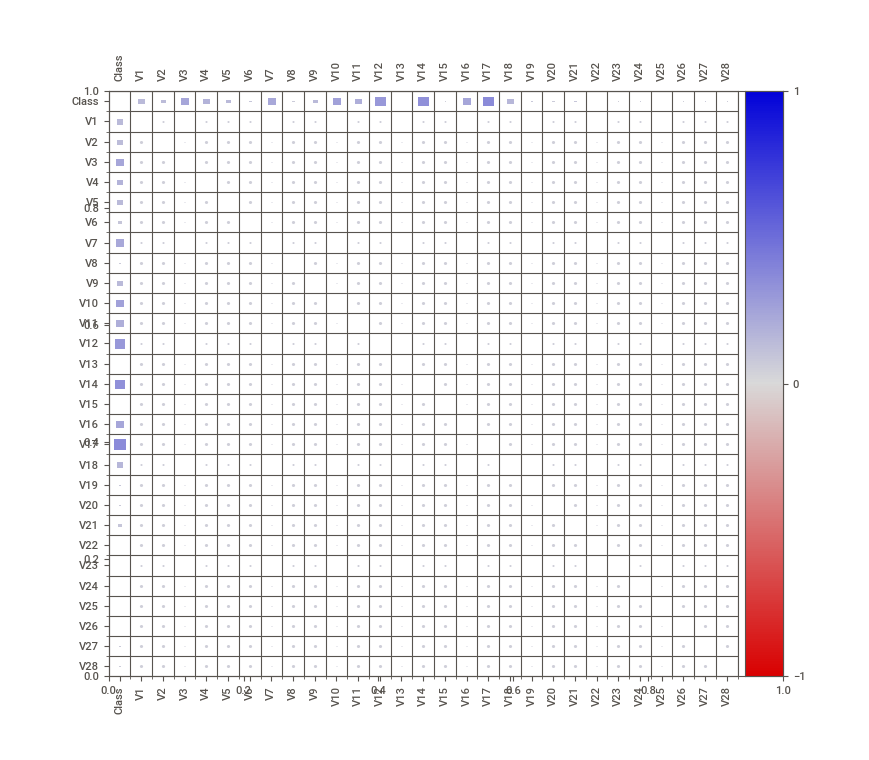
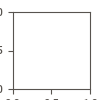

In [10]:
import sweetviz as sv
report=sv.analyze(data,target_feat="Class")
report.show_notebook()

In [11]:
#defining X and y 
X=data.iloc[:,:28]
y=data["Class"]

In [12]:
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (199364, 28)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 28)
Number transactions y_test dataset:  (85443,)


In [13]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 199008 



In [14]:
# imbalanced data handling 
sm = SMOTE(random_state = 42) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

In [15]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (398016, 28)
After OverSampling, the shape of train_y: (398016,) 

After OverSampling, counts of label '1': 199008
After OverSampling, counts of label '0': 199008


In [16]:
#appling the logistic model 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

